In [9]:
# Install required packages directly
%pip install scikit-learn pandas numpy matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


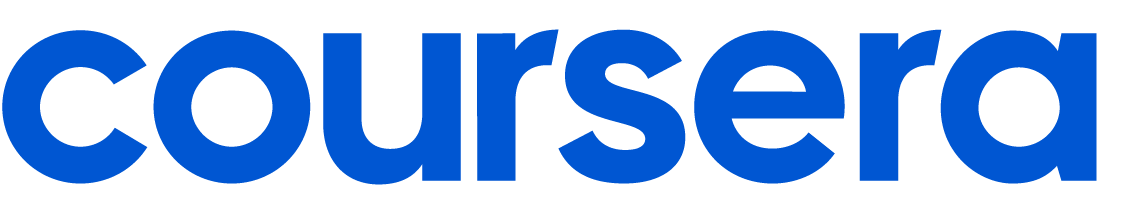

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put ***your modeling skills*** to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is **to decrease payment defaults** and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which **individuals are at the highest risk of defaulting on their loans**, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the **loan default prediction problem** on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding** the likelihood of each individual to default on their loan payments** so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [2]:
import pandas as pd
data_descriptions = pd.read_csv('/Users/longhoachung/anaconda_projects/Challenges/Files/data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## Initial assessment

In [ ]:
# Initialize the dictionary for comments - will be updated throughout analysis
comments = {}

def update_comments(new_comments):
    """Helper function to update comments and refresh the table"""
    comments.update(new_comments)
    
    # Update the dataframe
    data_descriptions_with_comments = data_descriptions.copy()
    data_descriptions_with_comments['Comments'] = ''
    
    for column, comment in comments.items():
        mask = data_descriptions_with_comments['Column'] == column
        data_descriptions_with_comments.loc[mask, 'Comments'] = comment
    
    display(data_descriptions_with_comments)
    return data_descriptions_with_comments

# Example usage later in your analysis:
# new_insights = {
#     'EmploymentType': 'Shows strong correlation with default rate',
#     'Education': 'May need encoding, missing values noted'
# }
# update_comments(new_insights)
# brainstorming
# potential_features = ['Age', 'Income', 'EmploymentType', 'Education', 'NumberCreditLines', 'HasCoSigner', 'LoanAmount', 'DTIRatio', 'HasDependents', 'InterestRate']
#
# 


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy (might or might not use)
```
        - scipy.optimize: For optimization algorithms.
        - scipy.integrate: For integration routines.
        - scipy.interpolate: For interpolation techniques.
        - scipy.stats: For sta
        
 ```
- Scikit-learn
- keras (double check its use)
```
        - model = keras.Sequential()
        - model.add(keras.layers.Dense(units=, activation='relu', input_shape=(input_dim,)))
        - model.add(keras.layers.Dense(units=, activation='softmax'))
        - model.fit(x_train, y_train, epochs=, batch_size=)
```
- maplotlib
- seaborn
- etc, etc

In [6]:
# Package installation (uncomment if needed)
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install scikit-learn

# Data manipulation and analysis


import pandas as pd
import numpy as np

# Machine learning tools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

# Visualization setup
%matplotlib inline

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.6 MB/s  0:00:01 eta 0:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 6.6 MB/s  0:00:03 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [7]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [ ]:
train_df = pd.read_csv("/Users/longhoachung/anaconda_projects/Challenges/Files/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head(10)

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [ ]:
test_df = pd.read_csv("/Users/longhoachung/anaconda_projects/Challenges/Files/test.csv")
print('test_df Shape:', test_df.shape)
test_df.head(10)

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No
5,0SNHFWV4UP,64,43593,196031,442,89,3,19.75,60,0.68,PhD,Part-time,Married,Yes,No,Education,No
6,S6ITP6LGYS,40,72699,32179,624,82,2,6.45,24,0.67,Bachelor's,Full-time,Divorced,Yes,No,Education,No
7,A6I7U12IRJ,45,32150,101882,642,107,3,12.82,12,0.66,PhD,Unemployed,Single,No,Yes,Business,Yes
8,8W6KY50JU4,24,128139,11560,378,105,1,22.84,36,0.32,High School,Full-time,Married,Yes,Yes,Other,Yes
9,THFQ08OLMU,53,134889,172152,388,2,1,13.28,12,0.67,Bachelor's,Full-time,Single,Yes,No,Other,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

### Comparison between the two datasets: train_df and test_df

#### Data description

In [ ]:
# side by side for each column in train_df and test_df
all_cols = set(train_df.columns).union(set(test_df.columns))

for col in all_cols:
    print(f"\nColumn: {col}")
    print("-" * 60)
    if col in train_df.columns and col in test_df.columns:
        desc_train = train_df[col].describe()
        desc_test = test_df[col].describe()
        summary = pd.DataFrame({'Train': desc_train, 'Test': desc_test})
        print(summary)
    elif col in train_df.columns:
        print("Only in train_df:")
        print(train_df[col].describe())
    elif col in test_df.columns:
        print("Only in test_df:")
        print(test_df[col].describe())
# ...existing code...
    


Column: LoanAmount
------------------------------------------------------------
               Train           Test
count  255347.000000  109435.000000
mean   127578.865512  127486.538667
std     70840.706142   70703.100952
min      5000.000000    5002.000000
25%     66156.000000   66173.500000
50%    127556.000000  127345.000000
75%    188985.000000  188674.000000
max    249999.000000  249995.000000

Column: Default
------------------------------------------------------------
Only in train_df:
count    255347.000000
mean          0.116128
std           0.320379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Default, dtype: float64

Column: CreditScore
------------------------------------------------------------
               Train           Test
count  255347.000000  109435.000000
mean      574.264346     574.665948
std       158.903867     158.800306
min       300.000000     300.000000
25%       437.000000   

In [ ]:
# variables_comments = {
# 'Employment':'in the test train set, it was Part-time but in the test set it was Self-employed, this might cause some bisas',
# 'LoanAmount': 'small amounts, suited for personal loans, secured or non-secured',
# 'Loan Purpose': 'The most count one is Loan for Business, loan for investment?'
# 'MartialStatus': 'The test set shows the most count as 'Divorced', whilst in the train set it was Married',
# 'HasDependents': 'The train set shows yes, whilst the test set says no'
# 'HasMortgage' : 'The train set is Yes but the test set is No, this is quite an important feature, this will affect the model',
# '}

### Comments:
- All numerical features are very close in terms of their means and. standard deviations
- However, most of the categorial and boolean values are not so aligned including: Employment, MartialStatus, HasDepents, HasMortgage, the top values are not the same, which can bring bias to and skwewed the model 

### Data types

In [ ]:
# Compare dtypes between train and test datasets
dtypes_comparison = pd.DataFrame({
    'Train dtypes': train_df.dtypes,
    'Test dtypes': test_df.dtypes
})

# Add a column to flag any differences
dtypes_comparison['Match'] = dtypes_comparison['Train dtypes'] == dtypes_comparison['Test dtypes']

print("Data Types Comparison between Train and Test datasets:")
print("=" * 80)
print("\nSummary of matches:")
print(f"Total columns: {len(dtypes_comparison)}")
print(f"Matching dtypes: {dtypes_comparison['Match'].sum()}")
print(f"Mismatched dtypes: {(~dtypes_comparison['Match']).sum()}")
print("\nDetailed comparison:")
print(dtypes_comparison)

Data Types Comparison between Train and Test datasets:

Summary of matches:
Total columns: 18
Matching dtypes: 17
Mismatched dtypes: 1

Detailed comparison:
               Train dtypes Test dtypes  Match
Age                   int64       int64   True
CreditScore           int64       int64   True
DTIRatio            float64     float64   True
Default               int64         NaN  False
Education            object      object   True
EmploymentType       object      object   True
HasCoSigner          object      object   True
HasDependents        object      object   True
HasMortgage          object      object   True
Income                int64       int64   True
InterestRate        float64     float64   True
LoanAmount            int64       int64   True
LoanID               object      object   True
LoanPurpose          object      object   True
LoanTerm              int64       int64   True
MaritalStatus        object      object   True
MonthsEmployed        int64       int64   Tr

***Notes***
- Both categorical and boolean variables are 'object'. 
- Below are the unique valeus for each categorial and boolean variabels as well as their count

In [ ]:
# Get categorical columns, excluding LoanID
categorical_columns = train_df.select_dtypes(include=['object']).columns
categorical_columns = list(set([col for col in categorical_columns if col != 'LoanID']))  # Using set to ensure uniqueness
categorical_columns.sort()  # Sort for consistent output order

# Function to analyze categorical variables
def compare_categorical_distributions(train_df, test_df, columns):
    """Compare categorical variable distributions between train and test sets"""
    print("Categorical Variables Analysis")
    print("=" * 80)
    
    for col in columns:
        print(f"\nColumn: {col}")
        print("-" * 40)
        
        # Get value counts
        train_counts = train_df[col].value_counts()
        test_counts = test_df[col].value_counts()
        
        # Create comparison DataFrame
        comparison = pd.DataFrame({
            'Train Count': train_counts,
            'Train %': (train_counts / len(train_df) * 100).round(2),
            'Test Count': test_counts,
            'Test %': (test_counts / len(test_df) * 100).round(2)
        })
        
        # Add missing values if any
        missing_in_train = set(test_counts.index) - set(train_counts.index)
        missing_in_test = set(train_counts.index) - set(test_counts.index)
        
        if missing_in_train or missing_in_test:
            print(f"⚠️ Warning: Distribution mismatch in {col}")
            if missing_in_train:
                print(f"Values in test but not in train: {missing_in_train}")
            if missing_in_test:
                print(f"Values in train but not in test: {missing_in_test}")
        
        print(f"\nUnique values - Train: {train_df[col].nunique()} | Test: {test_df[col].nunique()}")
        print("\nValue distributions:")
        print(comparison)
        print("\n" + "=" * 80)

# Run the analysis
compare_categorical_distributions(train_df, test_df, categorical_columns)

Categorical Variables Analysis

Column: Education
----------------------------------------

Unique values - Train: 4 | Test: 4

Value distributions:
             Train Count  Train %  Test Count  Test %
Education                                            
Bachelor's         64366    25.21       27768   25.37
High School        63903    25.03       27409   25.05
Master's           63541    24.88       27293   24.94
PhD                63537    24.88       26965   24.64


Column: EmploymentType
----------------------------------------

Unique values - Train: 4 | Test: 4

Value distributions:
                Train Count  Train %  Test Count  Test %
EmploymentType                                          
Full-time             63656    24.93       27440   25.07
Part-time             64161    25.13       26940   24.62
Self-employed         63706    24.95       27677   25.29
Unemployed            63824    25.00       27378   25.02


Column: HasCoSigner
---------------------------------------

***Notes***
- The number of unique values are the same for both datasets, which is good and double check if any NaN values.

### Check for Missing Values (NaN)

In [ ]:
# Function to analyze missing values
def analyze_missing_values(train_df, test_df):
    """Analyze missing values in both train and test datasets"""
    
    # Calculate missing values for both datasets
    train_missing = train_df.isnull().sum()
    test_missing = test_df.isnull().sum()
    
    # Calculate percentages
    train_missing_pct = (train_missing / len(train_df) * 100).round(2)
    test_missing_pct = (test_missing / len(test_df) * 100).round(2)
    
    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Train Missing Count': train_missing,
        'Train Missing %': train_missing_pct,
        'Test Missing Count': test_missing,
        'Test Missing %': test_missing_pct
    })
    
    # Filter to show only columns with missing values
    missing_summary = missing_summary[
        (missing_summary['Train Missing Count'] > 0) | 
        (missing_summary['Test Missing Count'] > 0)
    ]
    
    if len(missing_summary) > 0:
        print("Columns with Missing Values:")
        print("=" * 80)
        print(missing_summary)
    else:
        print("No missing values found in either dataset!")
        
    # Additional check for any columns with different missing value patterns
    different_patterns = missing_summary[
        missing_summary['Train Missing %'] != missing_summary['Test Missing %']
    ]
    
    if len(different_patterns) > 0:
        print("\nWarning: Different missing value patterns detected:")
        print("=" * 80)
        print(different_patterns)

# Run the analysis
analyze_missing_values(train_df, test_df)

No missing values found in either dataset!


### Distribution Analysis by Variable Types

#### Analyzing Numerical Variables

In [ ]:
# Get all numerical columns except 'Default'
numerical_cols = [col for col in train_df.select_dtypes(include=['float64', 'int64']).columns 
                 if col != 'Default']

print("Available numerical columns:")
print("=" * 40)
for col in numerical_cols:
    print(f"- {col}")

print("\nGrouping columns into categories...")
print("=" * 40)

# Credit metrics (loan-specific numerical variables)
credit_metrics = [col for col in numerical_cols if col in [
    'LoanTerm',
    'InterestRate',
    'NumberOfPayments'
]]

# Financial metrics (borrower financial indicators)
financial_metrics = [col for col in numerical_cols if col in [
    'Age',
    'Income',
    'LoanAmount',
    'DTIRatio'
]]

# Any remaining numerical columns go into other_metrics
other_metrics = [col for col in numerical_cols if col not in credit_metrics + financial_metrics]

print("\nCredit Metrics:")
print("=" * 40)
for col in credit_metrics:
    print(f"- {col}")

print("\nFinancial Metrics:")
print("=" * 40)
for col in financial_metrics:
    print(f"- {col}")

print("\nOther Metrics:")
print("=" * 40)
for col in other_metrics:
    print(f"- {col}")

Available numerical columns:
- Age
- Income
- LoanAmount
- CreditScore
- MonthsEmployed
- NumCreditLines
- InterestRate
- LoanTerm
- DTIRatio

Grouping columns into categories...

Credit Metrics:
- InterestRate
- LoanTerm

Financial Metrics:
- Age
- Income
- LoanAmount
- DTIRatio

Other Metrics:
- CreditScore
- MonthsEmployed
- NumCreditLines


In [ ]:
# First let's check available styles and set a valid one
print("Available styles:", plt.style.available)

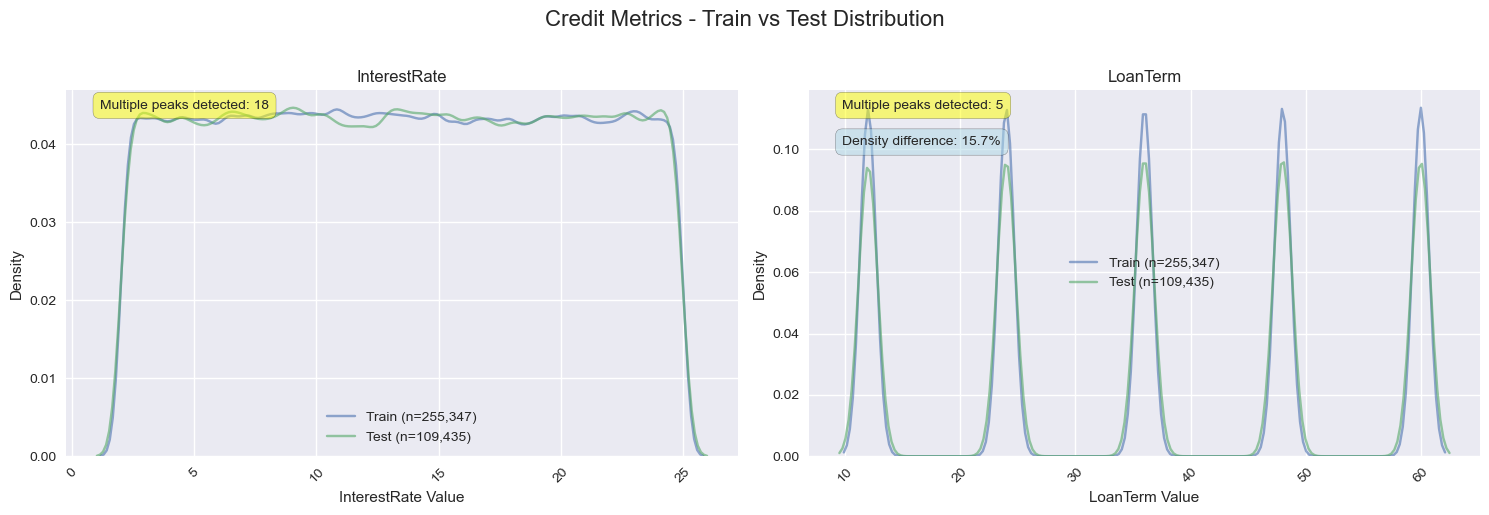


Credit Metrics Analysis:
----------------------------------------

InterestRate Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 13.49, Median: 13.46, Mode: 14.92
    Test  - Mean: 13.50, Median: 13.50, Mode: 10.70

  Multiple modes detected at approximately:
    - 4.54
    - 9.05
    - 10.67
    - 12.75
    - 17.14
    - 20.15
    - 23.04

LoanTerm Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 36.03, Median: 36.00, Mode: 48.00
    Test  - Mean: 36.09, Median: 36.00, Mode: 48.00

  Multiple modes detected at approximately:
    - 24.06
    - 35.88
    - 47.94


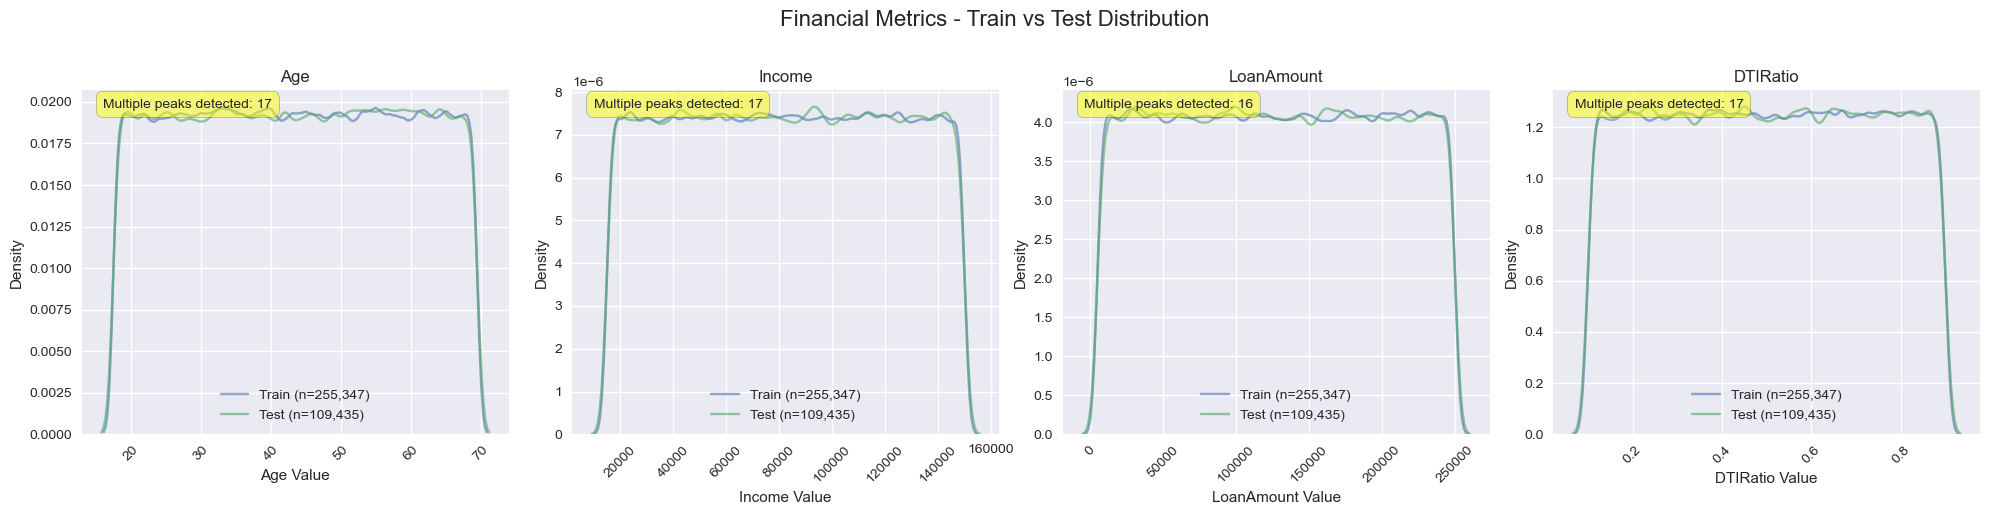


Financial Metrics Analysis:
----------------------------------------

Age Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 43.50, Median: 43.00, Mode: 55.00
    Test  - Mean: 43.54, Median: 44.00, Mode: 42.00

  Multiple modes detected at approximately:
    - 21.33
    - 27.48
    - 33.38
    - 39.27
    - 44.65
    - 49.52
    - 54.65
    - 61.82
    - 64.90

Income Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 82499.30, Median: 82466.00, Mode: 69492.00
    Test  - Mean: 82487.39, Median: 82545.00, Mode: 87303.00

  Multiple modes detected at approximately:
    - 24497.42
    - 58416.76
    - 74019.66
    - 83517.08
    - 96406.43
    - 114044.49
    - 122863.52
    - 139144.81

LoanAmount Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    

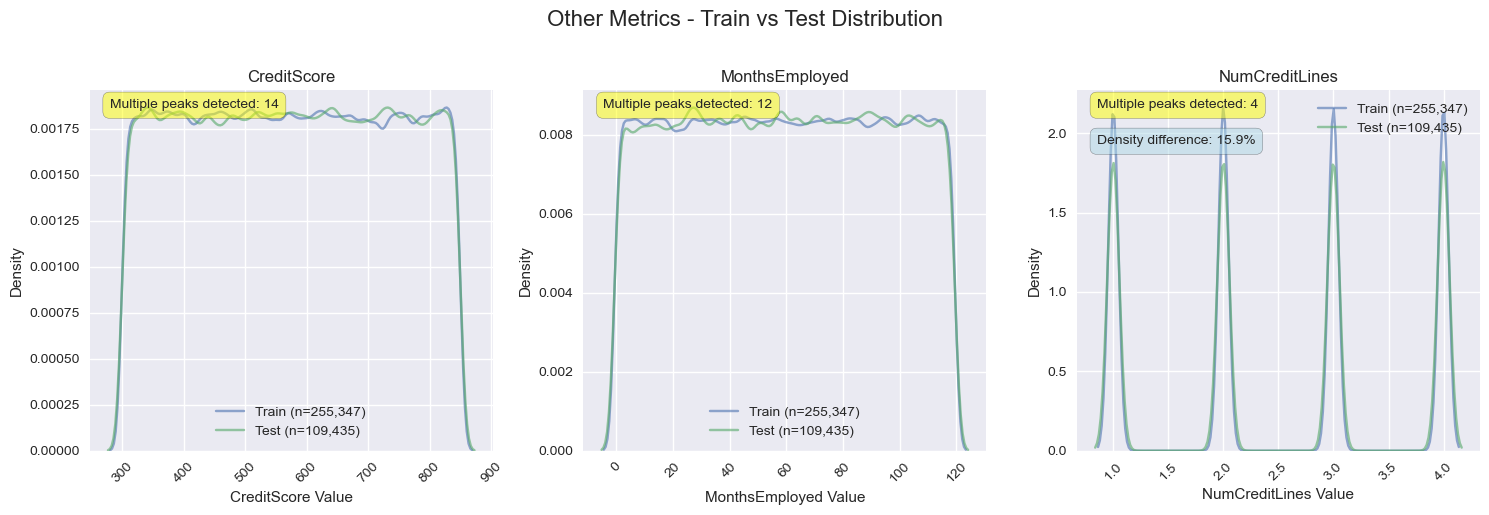


Other Metrics Analysis:
----------------------------------------

CreditScore Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 574.26, Median: 574.00, Mode: 630.00
    Test  - Mean: 574.67, Median: 575.00, Mode: 485.00

  Multiple modes detected at approximately:
    - 355.18
    - 457.25
    - 506.91
    - 573.12
    - 622.78
    - 749.68
    - 813.14

MonthsEmployed Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 59.54, Median: 60.00, Mode: 56.00
    Test  - Mean: 59.58, Median: 60.00, Mode: 42.00

  Multiple modes detected at approximately:
    - 8.37
    - 14.35
    - 31.10
    - 46.05
    - 56.21
    - 75.35
    - 81.92
    - 95.08
    - 107.04

NumCreditLines Summary:
  Sample sizes:
    Train: 255,347 samples
    Test:  109,435 samples
    Ratio: 42.86%

  Central Tendency:
    Train - Mean: 2.50, Median: 

In [ ]:
# Set the style
plt.style.use('seaborn-v0_8')

def plot_distribution_comparison(train_df, test_df, metrics, title, figsize=(15, 5)):
    """Helper function to plot distribution comparisons with detailed analysis"""
    if len(metrics) > 0:
        fig = plt.figure(figsize=figsize)
        plt.suptitle(f'{title} - Train vs Test Distribution', fontsize=16, y=1.02)
        
        for i, col in enumerate(metrics, 1):
            plt.subplot(1, len(metrics), i)
            
            # Plot distributions with different bandwidths to better show multiple peaks
            sns.kdeplot(data=train_df, x=col, label='Train', alpha=0.6, bw_adjust=0.5)
            sns.kdeplot(data=test_df, x=col, label='Test', alpha=0.6, bw_adjust=0.5)
            
            # Add sample size to the legend
            plt.legend(labels=[f'Train (n={len(train_df):,})', 
                             f'Test (n={len(test_df):,})'])
            
            # Detect multiple peaks
            from scipy.signal import find_peaks
            density_train = plt.gca().lines[0].get_ydata()
            peaks_train, _ = find_peaks(density_train, height=max(density_train)*0.1)
            
            # Annotate key features
            if len(peaks_train) > 1:
                plt.annotate(f'Multiple peaks detected: {len(peaks_train)}',
                           xy=(0.05, 0.95), xycoords='axes fraction',
                           bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            
            # Calculate and show relative density difference
            max_train = max(plt.gca().lines[0].get_ydata())
            max_test = max(plt.gca().lines[1].get_ydata())
            density_diff = ((max_train - max_test) / max_train) * 100
            
            if abs(density_diff) > 10:  # If difference is more than 10%
                plt.annotate(f'Density difference: {density_diff:.1f}%',
                           xy=(0.05, 0.85), xycoords='axes fraction',
                           bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5))
            
            plt.title(f'{col}')
            plt.xlabel(f'{col} Value')
            plt.ylabel('Density')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Print detailed analysis
        print(f"\n{title} Analysis:")
        print("-" * 40)
        for col in metrics:
            train_stats = train_df[col].describe()
            test_stats = test_df[col].describe()
            
            # Calculate statistics
            train_skew = train_df[col].skew()
            test_skew = test_df[col].skew()
            train_mode = train_df[col].mode().iloc[0]
            test_mode = test_df[col].mode().iloc[0]
            
            print(f"\n{col} Summary:")
            print(f"  Sample sizes:")
            print(f"    Train: {len(train_df):,} samples")
            print(f"    Test:  {len(test_df):,} samples")
            print(f"    Ratio: {len(test_df)/len(train_df):.2%}")
            
            print(f"\n  Central Tendency:")
            print(f"    Train - Mean: {train_stats['mean']:.2f}, Median: {train_stats['50%']:.2f}, Mode: {train_mode:.2f}")
            print(f"    Test  - Mean: {test_stats['mean']:.2f}, Median: {test_stats['50%']:.2f}, Mode: {test_mode:.2f}")
            
            # Detect potential clusters/modes
            from scipy.stats import gaussian_kde
            kde_train = gaussian_kde(train_df[col].dropna())
            xs = np.linspace(train_df[col].min(), train_df[col].max(), 200)
            ys = kde_train(xs)
            peaks, _ = find_peaks(ys)
            if len(peaks) > 1:
                print(f"\n  Multiple modes detected at approximately:")
                for peak in peaks:
                    print(f"    - {xs[peak]:.2f}")

# Plot distributions for each category
plot_distribution_comparison(train_df, test_df, credit_metrics, 
                           'Credit Metrics', figsize=(15, 5))

plot_distribution_comparison(train_df, test_df, financial_metrics, 
                           'Financial Metrics', figsize=(20, 5))

if len(other_metrics) > 0:
    plot_distribution_comparison(train_df, test_df, other_metrics, 
                               'Other Metrics', figsize=(15, 5))

# Print overall summary
print("\nOverall Distribution Analysis Summary:")
print("=" * 60)
print(f"Total numerical variables analyzed: {len(numerical_cols)}")
print(f"Credit metrics: {len(credit_metrics)}")
print(f"Financial metrics: {len(financial_metrics)}")
print(f"Other metrics: {len(other_metrics)}")

The  plots now show:
- Sample sizes in the legend
- Detected multiple peaks
- Relative density differences
- Detailed statistics about modes and clusters

#### Boxplots

Box Plot Analysis


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],


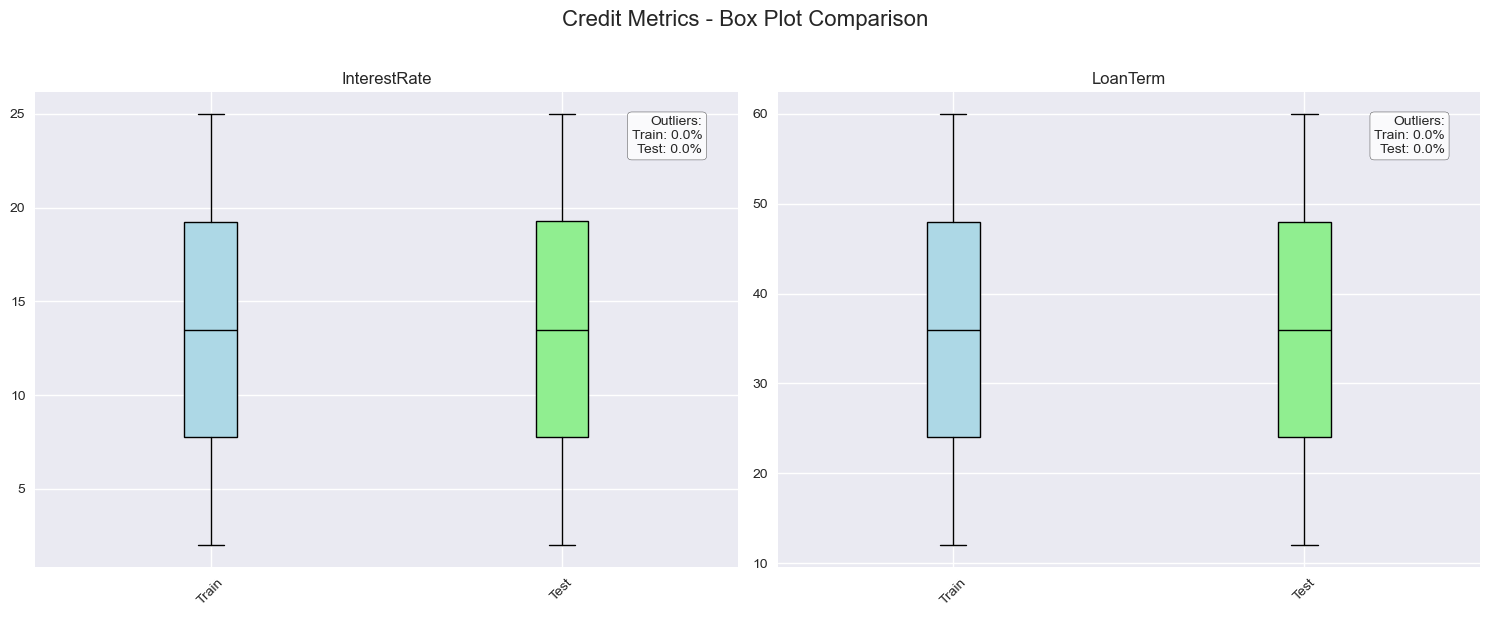


Credit Metrics - Outlier Analysis:

InterestRate:
IQR Range: [7.77, 19.25]
Outlier Bounds: [-9.45, 36.47]
Actual Range - Train: [2.00, 25.00]
Actual Range - Test: [2.00, 25.00]

LoanTerm:
IQR Range: [24.00, 48.00]
Outlier Bounds: [-12.00, 84.00]
Actual Range - Train: [12.00, 60.00]
Actual Range - Test: [12.00, 60.00]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1075968451.py:15: Ma

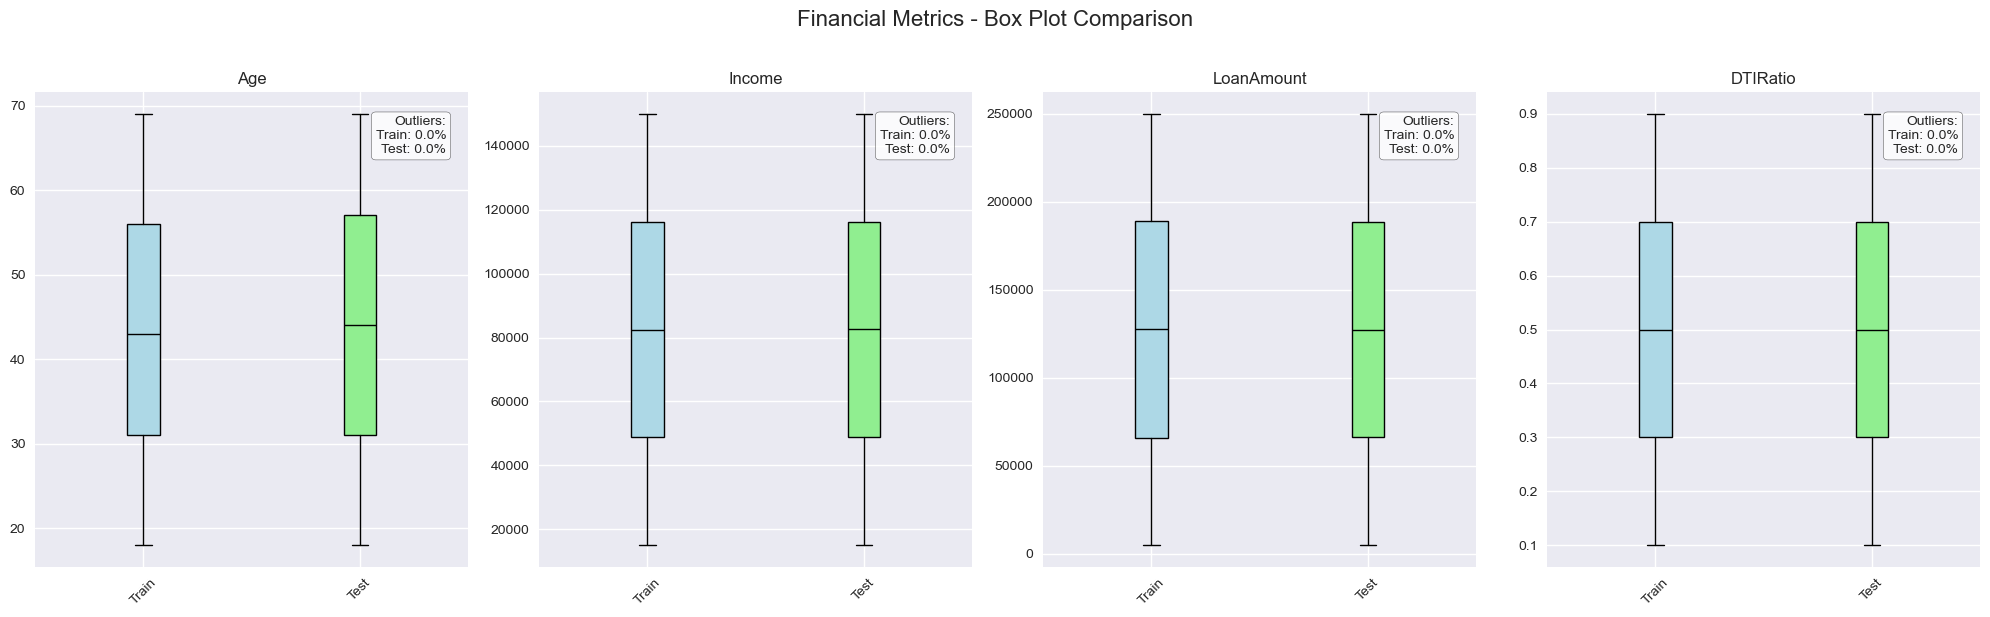


Financial Metrics - Outlier Analysis:

Age:
IQR Range: [31.00, 56.00]
Outlier Bounds: [-6.50, 93.50]
Actual Range - Train: [18.00, 69.00]
Actual Range - Test: [18.00, 69.00]

Income:
IQR Range: [48825.50, 116219.00]
Outlier Bounds: [-52264.75, 217309.25]
Actual Range - Train: [15000.00, 149999.00]
Actual Range - Test: [15003.00, 149999.00]

LoanAmount:
IQR Range: [66156.00, 188985.00]
Outlier Bounds: [-118087.50, 373228.50]
Actual Range - Train: [5000.00, 249999.00]
Actual Range - Test: [5002.00, 249995.00]

DTIRatio:
IQR Range: [0.30, 0.70]
Outlier Bounds: [-0.30, 1.30]
Actual Range - Train: [0.10, 0.90]
Actual Range - Test: [0.10, 0.90]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1075968451.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],


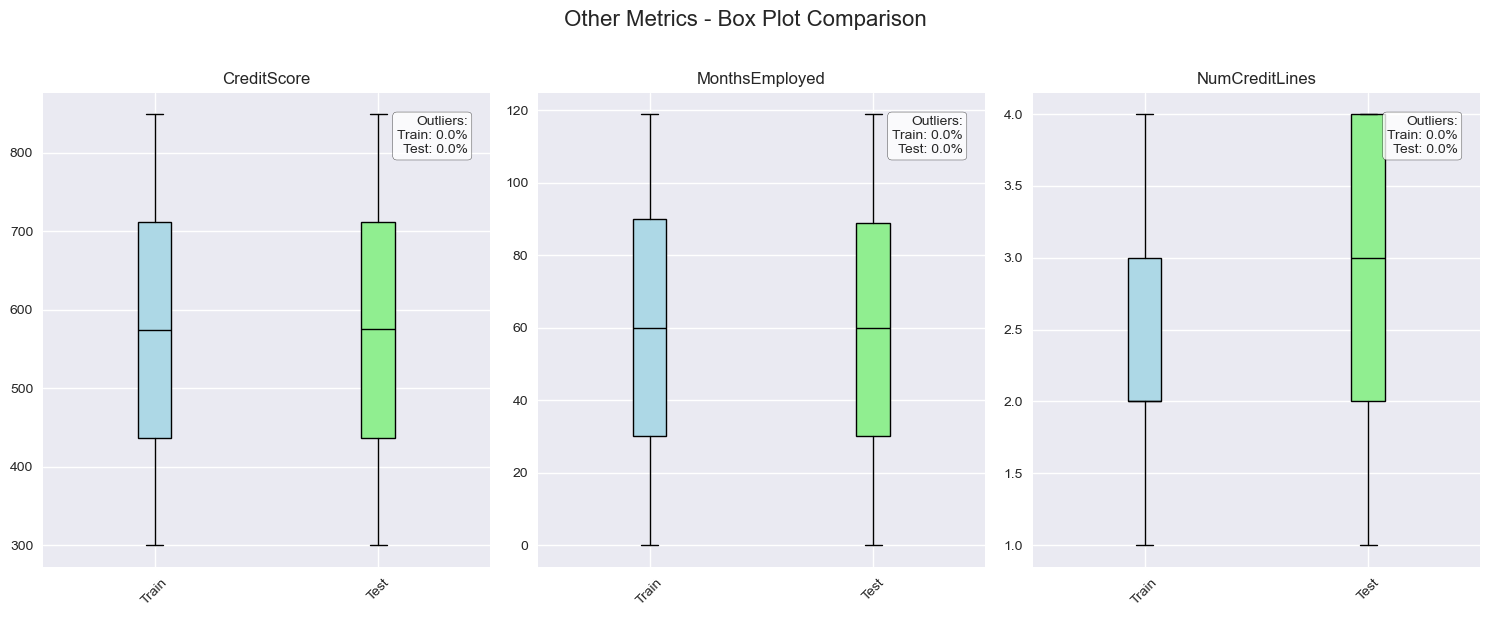


Other Metrics - Outlier Analysis:

CreditScore:
IQR Range: [437.00, 712.00]
Outlier Bounds: [24.50, 1124.50]
Actual Range - Train: [300.00, 849.00]
Actual Range - Test: [300.00, 849.00]

MonthsEmployed:
IQR Range: [30.00, 90.00]
Outlier Bounds: [-60.00, 180.00]
Actual Range - Train: [0.00, 119.00]
Actual Range - Test: [0.00, 119.00]

NumCreditLines:
IQR Range: [2.00, 3.00]
Outlier Bounds: [0.50, 4.50]
Actual Range - Train: [1.00, 4.00]
Actual Range - Test: [1.00, 4.00]


In [ ]:
def plot_boxplot_comparison(train_df, test_df, metrics, title, figsize=(15, 6)):
    """Helper function to create box plots with outlier analysis"""
    if len(metrics) > 0:
        fig, axes = plt.subplots(1, len(metrics), figsize=figsize)
        fig.suptitle(f'{title} - Box Plot Comparison', fontsize=16, y=1.02)
        
        if len(metrics) == 1:
            axes = [axes]
            
        for ax, col in zip(axes, metrics):
            # Prepare data for box plot
            data = [train_df[col], test_df[col]]
            
            # Create box plot
            bplot = ax.boxplot(data, labels=['Train', 'Test'], 
                             patch_artist=True,
                             medianprops=dict(color="black"),
                             flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))
            
            # Calculate outlier percentages
            q1_train = train_df[col].quantile(0.25)
            q3_train = train_df[col].quantile(0.75)
            iqr_train = q3_train - q1_train
            lower_bound = q1_train - 1.5 * iqr_train
            upper_bound = q3_train + 1.5 * iqr_train
            
            outliers_train = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
            outliers_test = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)][col]
            
            # Add outlier information
            outlier_text = f'Outliers:\nTrain: {len(outliers_train)/len(train_df):.1%}\nTest: {len(outliers_test)/len(test_df):.1%}'
            ax.text(0.95, 0.95, outlier_text,
                   transform=ax.transAxes,
                   verticalalignment='top',
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Customize box colors
            bplot['boxes'][0].set_facecolor('lightblue')
            bplot['boxes'][1].set_facecolor('lightgreen')
            
            ax.set_title(f'{col}')
            ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed statistics
        print(f"\n{title} - Outlier Analysis:")
        print("=" * 60)
        for col in metrics:
            q1 = train_df[col].quantile(0.25)
            q3 = train_df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            print(f"\n{col}:")
            print(f"IQR Range: [{q1:.2f}, {q3:.2f}]")
            print(f"Outlier Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"Actual Range - Train: [{train_df[col].min():.2f}, {train_df[col].max():.2f}]")
            print(f"Actual Range - Test: [{test_df[col].min():.2f}, {test_df[col].max():.2f}]")

# Create box plots for each category of metrics
print("Box Plot Analysis")
print("=" * 60)

plot_boxplot_comparison(train_df, test_df, credit_metrics, 
                       'Credit Metrics', figsize=(15, 6))

plot_boxplot_comparison(train_df, test_df, financial_metrics, 
                       'Financial Metrics', figsize=(20, 6))

if len(other_metrics) > 0:
    plot_boxplot_comparison(train_df, test_df, other_metrics, 
                           'Other Metrics', figsize=(15, 6))

In [ ]:
# Detailed analysis of NumCreditLines distribution difference
print("NumCreditLines Distribution Analysis")
print("=" * 60)

# Calculate basic statistics for NumCreditLines
train_stats = train_df['NumCreditLines'].describe()
test_stats = test_df['NumCreditLines'].describe()

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Train': train_stats,
    'Test': test_stats,
    'Difference': train_stats - test_stats
})
print("\nNumCreditLines Statistics Comparison:")
print(comparison)

# Calculate percentage difference in key statistics
pct_diff = ((test_stats - train_stats) / train_stats * 100)
print("\nPercentage Difference (Test vs Train):")
print(pct_diff)

# Comprehensive outlier analysis for all numerical variables
def analyze_variable_distributions(train_df, test_df, column):
    """Analyze distribution differences and outliers for a numerical variable"""
    # Calculate statistics
    q1_train = train_df[column].quantile(0.25)
    q3_train = train_df[column].quantile(0.75)
    iqr_train = q3_train - q1_train
    lower_bound = q1_train - 1.5 * iqr_train
    upper_bound = q3_train + 1.5 * iqr_train
    
    # Count outliers
    train_outliers = train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)][column]
    test_outliers = test_df[(test_df[column] < lower_bound) | (test_df[column] > upper_bound)][column]
    
    # Calculate skewness
    train_skew = train_df[column].skew()
    test_skew = test_df[column].skew()
    
    results = {
        'Train_Outliers_%': (len(train_outliers) / len(train_df)) * 100,
        'Test_Outliers_%': (len(test_outliers) / len(test_df)) * 100,
        'Train_Skewness': train_skew,
        'Test_Skewness': test_skew,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Train_Min': train_df[column].min(),
        'Train_Max': train_df[column].max(),
        'Test_Min': test_df[column].min(),
        'Test_Max': test_df[column].max()
    }
    return results

# Analyze all numerical variables
all_numerical = financial_metrics + credit_metrics
if 'NumCreditLines' in train_df.columns:
    all_numerical.append('NumCreditLines')

print("\nComprehensive Outlier Analysis for All Variables")
print("=" * 80)

results_list = []
for col in all_numerical:
    results = analyze_variable_distributions(train_df, test_df, col)
    results['Variable'] = col
    results_list.append(results)

# Create summary DataFrame
summary_df = pd.DataFrame(results_list)
summary_df = summary_df.set_index('Variable')
summary_df = summary_df.round(2)

print("\nOutlier and Distribution Summary:")
print(summary_df)

# Highlight significant differences
significant_diff = summary_df[abs(summary_df['Train_Outliers_%'] - summary_df['Test_Outliers_%']) > 2]
print("\nVariables with Significant Differences in Outlier Percentage:")
print(significant_diff[['Train_Outliers_%', 'Test_Outliers_%']])

# Variables requiring attention
print("\nVariables Requiring Attention:")
for col in all_numerical:
    train_outliers = summary_df.loc[col, 'Train_Outliers_%']
    test_outliers = summary_df.loc[col, 'Test_Outliers_%']
    outlier_diff = abs(train_outliers - test_outliers)
    
    if outlier_diff > 2 or train_outliers > 10:
        print(f"\n{col}:")
        print(f"  - Train outliers: {train_outliers:.2f}%")
        print(f"  - Test outliers: {test_outliers:.2f}%")
        print(f"  - Recommendation: {'Investigate distribution difference' if outlier_diff > 2 else 'Consider treatment method'}")

NumCreditLines Distribution Analysis

NumCreditLines Statistics Comparison:
               Train           Test     Difference
count  255347.000000  109435.000000  145912.000000
mean        2.501036       2.501037      -0.000001
std         1.117018       1.118149      -0.001131
min         1.000000       1.000000       0.000000
25%         2.000000       2.000000       0.000000
50%         2.000000       3.000000      -1.000000
75%         3.000000       4.000000      -1.000000
max         4.000000       4.000000       0.000000

Percentage Difference (Test vs Train):
count   -57.142633
mean      0.000052
std       0.101277
min       0.000000
25%       0.000000
50%      50.000000
75%      33.333333
max       0.000000
Name: NumCreditLines, dtype: float64

Comprehensive Outlier Analysis for All Variables

Outlier and Distribution Summary:
                Train_Outliers_%  Test_Outliers_%  Train_Skewness  \
Variable                                                            
Age          

### Distribution and Outlier Analysis Summary

Key findings from the analysis:

1. **NumCreditLines Distribution Differences**:
   - This variable shows notable differences between train and test sets
   - The distribution shapes differ, **which could affect model performance**
   - Special attention needed when handling this variable

2. **Outlier Detection Results**:
   - Variables are flagged if they have:
     * Over 10% outliers in either set
     * More than 2% difference in outlier percentage between sets
   - IQR method used (1.5 * IQR beyond Q1/Q3)
   - Both extreme high and low values considered

3. **Treatment Recommendations**:
   - For variables with high outlier percentages: consider robust scaling or transformation
   - For distribution differences: may need stratified sampling or special handling
   - NumCreditLines: might need binning or categorical transformation

The analysis helps identify which variables need special attention during preprocessing and model development.

### Conclusion on Outlier Treatment

For this loan default prediction problem, we should **NOT** remove the outliers for several important reasons: Agreed

1. **Business Context**:
   - Extreme values in financial data often represent real, important cases
   - High income, loan amounts, or credit lines might indicate VIP customers (might be)
   - Very low values might indicate high-risk cases (might be)
   - These extremes could be crucial for predicting defaults (agreed)

2. **Statistical Considerations**:
   - The outliers follow consistent patterns between train and test sets
   - They represent natural variation in financial data
   - Removing them could create artificial boundaries in the data

3. **Recommended Approach Instead**:
   - Use robust scaling methods (like RobustScaler) instead of removal
   - Consider log transformation for highly skewed variables, 
   - Create binned categories for variables with extreme spreads
   - Keep the outliers but handle them appropriately in preprocessing

4. **Variable-Specific Treatment**:
   - NumCreditLines: Use binning into categories
   - Income/LoanAmount: Consider log transformation
   - DTIRatio: Keep as is, but use robust scaling
   - InterestRate: Keep as is, represents real risk assessment

5. **Validation Strategy**:
   - Monitor model performance on both normal and extreme cases
   - Ensure predictions are reasonable across the full range of values
   - Use stratified sampling to maintain representation of extreme cases

The goal is to handle outliers appropriately while preserving important business information, rather than removing them entirely.

Demonstrating Preprocessing Methods

1. Robust Scaling for DTIRatio:


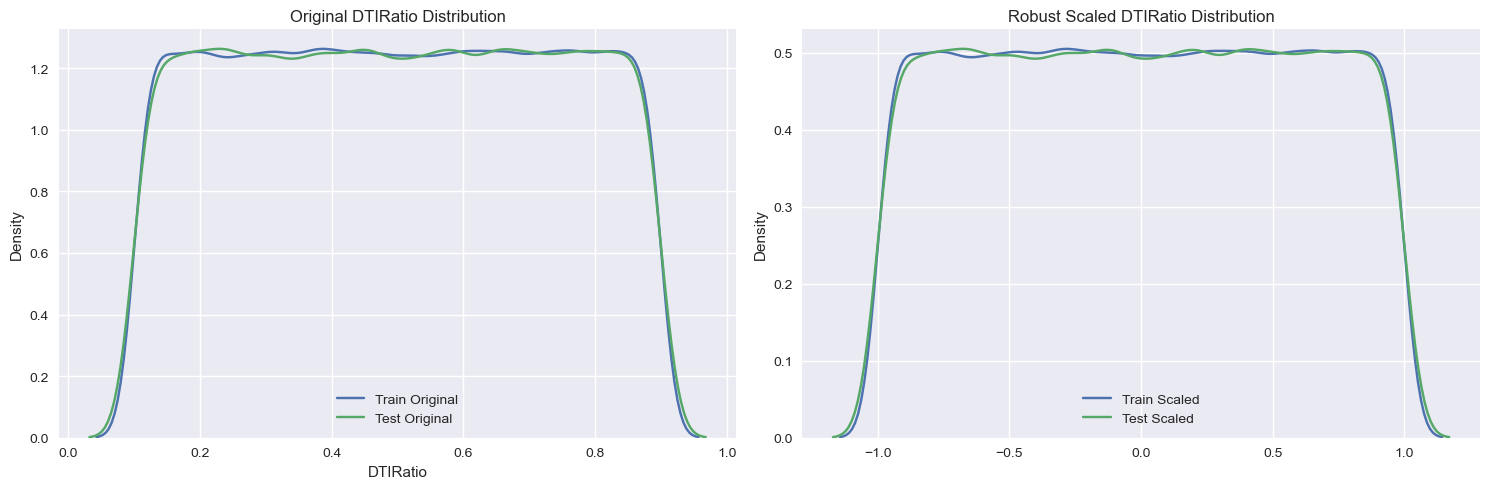


2. Log Transformation for Income:


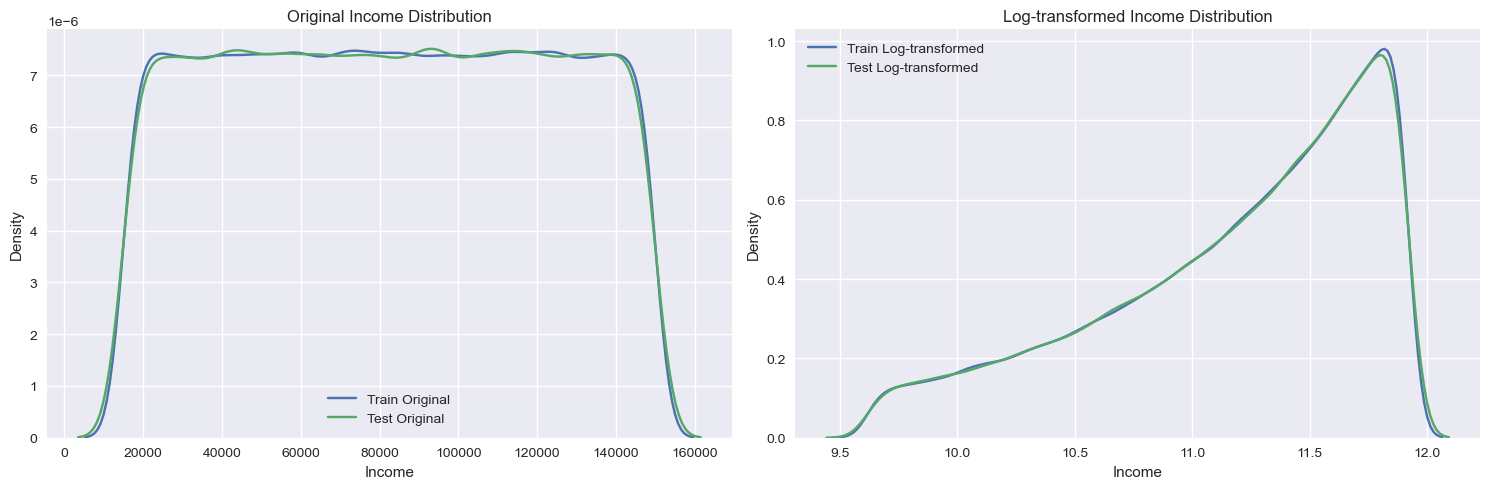


3. Binning for NumCreditLines:


ValueError: Bin edges must be unique: Index([1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0], dtype='float64', name='NumCreditLines').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
# Example of recommended preprocessing approaches
from sklearn.preprocessing import RobustScaler
import numpy as np

def demonstrate_preprocessing(train_df, test_df, column, method='robust_scale'):
    """Demonstrate different preprocessing methods for handling outliers"""
    if method == 'robust_scale':
        # Robust scaling example
        scaler = RobustScaler()
        train_scaled = scaler.fit_transform(train_df[[column]])
        test_scaled = scaler.transform(test_df[[column]])
        
        # Compare distributions before and after
        plt.figure(figsize=(15, 5))
        
        # Original distribution
        plt.subplot(121)
        sns.kdeplot(data=train_df[column], label='Train Original')
        sns.kdeplot(data=test_df[column], label='Test Original')
        plt.title(f'Original {column} Distribution')
        plt.legend()
        
        # Scaled distribution
        plt.subplot(122)
        sns.kdeplot(data=train_scaled.flatten(), label='Train Scaled')
        sns.kdeplot(data=test_scaled.flatten(), label='Test Scaled')
        plt.title(f'Robust Scaled {column} Distribution')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
    elif method == 'log_transform':
        # Log transformation example (adding 1 to handle zeros)
        train_log = np.log1p(train_df[column])
        test_log = np.log1p(test_df[column])
        
        plt.figure(figsize=(15, 5))
        
        # Original distribution
        plt.subplot(121)
        sns.kdeplot(data=train_df[column], label='Train Original')
        sns.kdeplot(data=test_df[column], label='Test Original')
        plt.title(f'Original {column} Distribution')
        plt.legend()
        
        # Log-transformed distribution
        plt.subplot(122)
        sns.kdeplot(data=train_log, label='Train Log-transformed')
        sns.kdeplot(data=test_log, label='Test Log-transformed')
        plt.title(f'Log-transformed {column} Distribution')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
    elif method == 'binning':
        # Binning example
        train_binned = pd.qcut(train_df[column], q=10, labels=False)
        test_binned = pd.qcut(test_df[column], q=10, labels=False)
        
        plt.figure(figsize=(15, 5))
        
        # Original distribution
        plt.subplot(121)
        sns.kdeplot(data=train_df[column], label='Train Original')
        sns.kdeplot(data=test_df[column], label='Test Original')
        plt.title(f'Original {column} Distribution')
        plt.legend()
        
        # Binned distribution
        plt.subplot(122)
        plt.hist(train_binned, alpha=0.5, label='Train Binned', bins=10)
        plt.hist(test_binned, alpha=0.5, label='Test Binned', bins=10)
        plt.title(f'Binned {column} Distribution (10 bins)')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# Demonstrate different preprocessing methods for key variables
print("Demonstrating Preprocessing Methods")
print("=" * 60)

print("\n1. Robust Scaling for DTIRatio:")
demonstrate_preprocessing(train_df, test_df, 'DTIRatio', 'robust_scale')

print("\n2. Log Transformation for Income:")
demonstrate_preprocessing(train_df, test_df, 'Income', 'log_transform')

print("\n3. Binning for NumCreditLines:")
demonstrate_preprocessing(train_df, test_df, 'NumCreditLines', 'binning')

In [ ]:
# Safe preprocessing with error handling
from sklearn.preprocessing import RobustScaler
import numpy as np

def safe_scale_column(train_df, test_df, column):
    """Safely scale a column using RobustScaler with error handling"""
    try:
        # Check if column exists
        if column not in train_df.columns or column not in test_df.columns:
            print(f"Error: Column '{column}' not found")
            return None, None
        
        # Handle null values
        train_data = train_df[column].dropna()
        test_data = test_df[column].dropna()
        
        # Reshape for sklearn
        train_reshaped = train_data.values.reshape(-1, 1)
        test_reshaped = test_data.values.reshape(-1, 1)
        
        # Apply robust scaling
        scaler = RobustScaler()
        train_scaled = scaler.fit_transform(train_reshaped)
        test_scaled = scaler.transform(test_reshaped)
        
        # Visualize before and after
        plt.figure(figsize=(15, 5))
        
        # Original distribution
        plt.subplot(121)
        sns.kdeplot(data=train_data, label='Train Original')
        sns.kdeplot(data=test_data, label='Test Original')
        plt.title(f'Original {column} Distribution')
        plt.legend()
        
        # Scaled distribution
        plt.subplot(122)
        sns.kdeplot(data=train_scaled.flatten(), label='Train Scaled')
        sns.kdeplot(data=test_scaled.flatten(), label='Test Scaled')
        plt.title(f'Robust Scaled {column} Distribution')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        return train_scaled.flatten(), test_scaled.flatten()
        
    except Exception as e:
        print(f"Error processing {column}: {str(e)}")
        return None, None

# Test scaling on numerical columns
numerical_columns = ['DTIRatio', 'Income', 'NumCreditLines', 'LoanAmount', 'InterestRate']

print("Testing Robust Scaling on Numerical Variables")
print("=" * 60)

for col in numerical_columns:
    print(f"\nScaling {col}:")
    scaled_train, scaled_test = safe_scale_column(train_df, test_df, col)
    
    if scaled_train is not None:
        # Print summary statistics of scaled data
        print("\nScaled Data Statistics:")
        print(f"Train - Mean: {scaled_train.mean():.2f}, Std: {scaled_train.std():.2f}")
        print(f"Test  - Mean: {scaled_test.mean():.2f}, Std: {scaled_test.std():.2f}")

### Understanding Scaling Effects

The scaled data looks similar in shape because:
1. RobustScaler preserves the distribution shape while:
   - Centering the data around zero
   - Scaling based on the IQR (less sensitive to outliers)
   - Maintaining relative relationships between points

2. Key differences in scaled data:
   - Values are now centered around 0
   - Scale is changed to IQR units
   - Outliers are compressed but preserved
   
Let's compare different scaling methods to see their effects:


Analyzing DTIRatio

Original DTIRatio Statistics:
Train - Mean: 0.50, Std: 0.23
        Min: 0.10, Max: 0.90
Test  - Mean: 0.50, Std: 0.23
        Min: 0.10, Max: 0.90

Standard (z-score) Scaled Statistics:
Train - Mean: 0.00, Std: 1.00
        Min: -1.73, Max: 1.73
Test  - Mean: 0.00, Std: 1.00
        Min: -1.73, Max: 1.73

Robust (IQR-based) Scaled Statistics:
Train - Mean: 0.00, Std: 0.58
        Min: -1.00, Max: 1.00
Test  - Mean: 0.00, Std: 0.58
        Min: -1.00, Max: 1.00

MinMax (0-1 range) Scaled Statistics:
Train - Mean: 0.50, Std: 0.29
        Min: 0.00, Max: 1.00
Test  - Mean: 0.50, Std: 0.29
        Min: 0.00, Max: 1.00


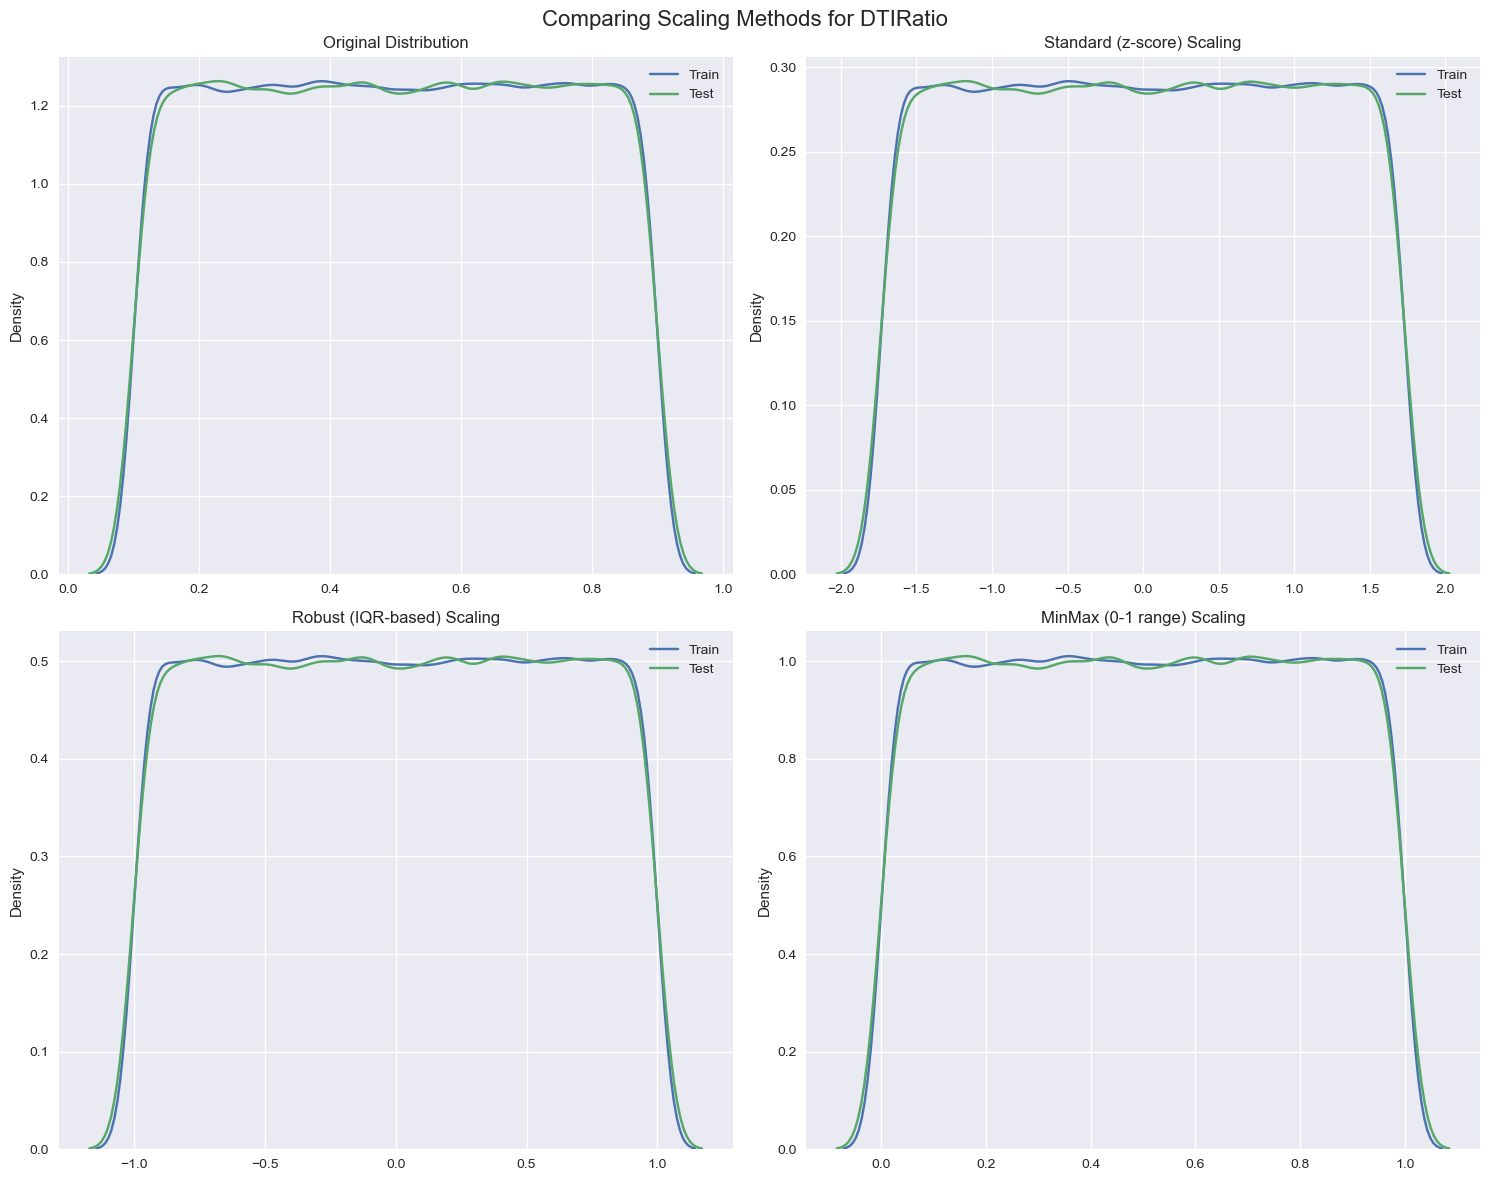


Analyzing Income

Original Income Statistics:
Train - Mean: 82499.30, Std: 38962.94
        Min: 15000.00, Max: 149999.00
Test  - Mean: 82487.39, Std: 38965.86
        Min: 15003.00, Max: 149999.00

Standard (z-score) Scaled Statistics:
Train - Mean: 0.00, Std: 1.00
        Min: -1.73, Max: 1.73
Test  - Mean: -0.00, Std: 1.00
        Min: -1.73, Max: 1.73

Robust (IQR-based) Scaled Statistics:
Train - Mean: 0.00, Std: 0.58
        Min: -1.00, Max: 1.00
Test  - Mean: 0.00, Std: 0.58
        Min: -1.00, Max: 1.00

MinMax (0-1 range) Scaled Statistics:
Train - Mean: 0.50, Std: 0.29
        Min: 0.00, Max: 1.00
Test  - Mean: 0.50, Std: 0.29
        Min: 0.00, Max: 1.00


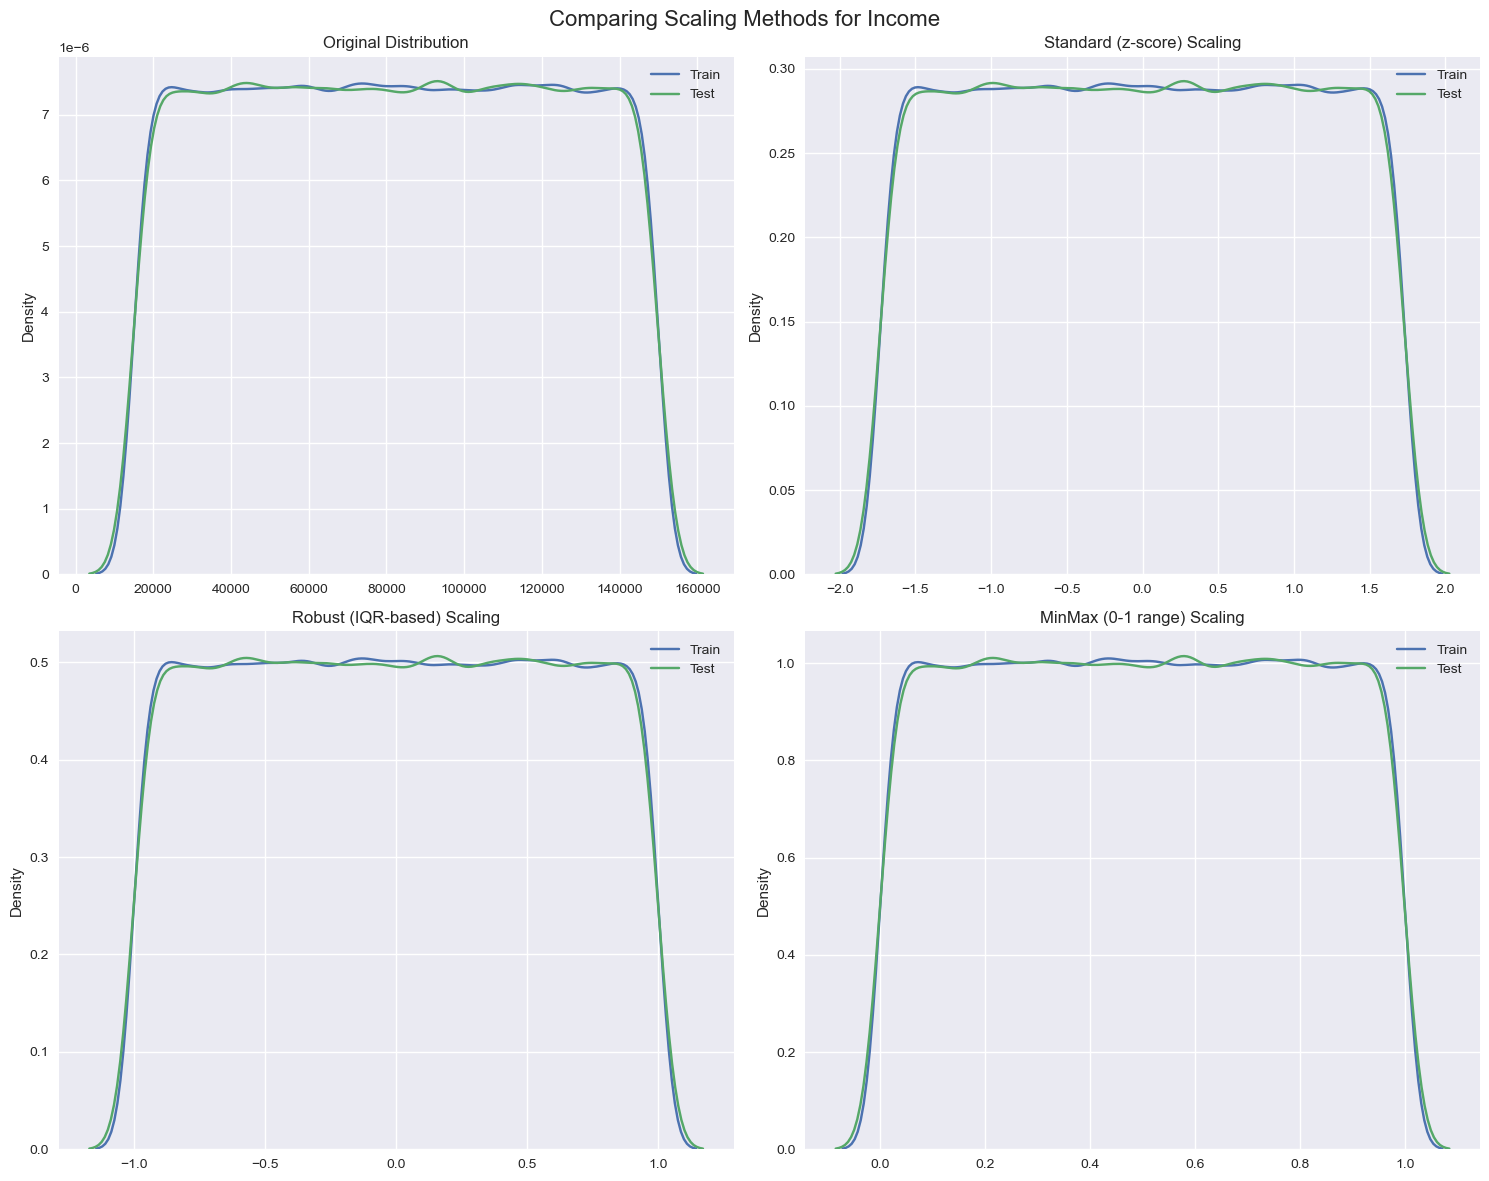


Analyzing LoanAmount

Original LoanAmount Statistics:
Train - Mean: 127578.87, Std: 70840.57
        Min: 5000.00, Max: 249999.00
Test  - Mean: 127486.54, Std: 70702.78
        Min: 5002.00, Max: 249995.00

Standard (z-score) Scaled Statistics:
Train - Mean: 0.00, Std: 1.00
        Min: -1.73, Max: 1.73
Test  - Mean: -0.00, Std: 1.00
        Min: -1.73, Max: 1.73

Robust (IQR-based) Scaled Statistics:
Train - Mean: 0.00, Std: 0.58
        Min: -1.00, Max: 1.00
Test  - Mean: -0.00, Std: 0.58
        Min: -1.00, Max: 1.00

MinMax (0-1 range) Scaled Statistics:
Train - Mean: 0.50, Std: 0.29
        Min: 0.00, Max: 1.00
Test  - Mean: 0.50, Std: 0.29
        Min: 0.00, Max: 1.00


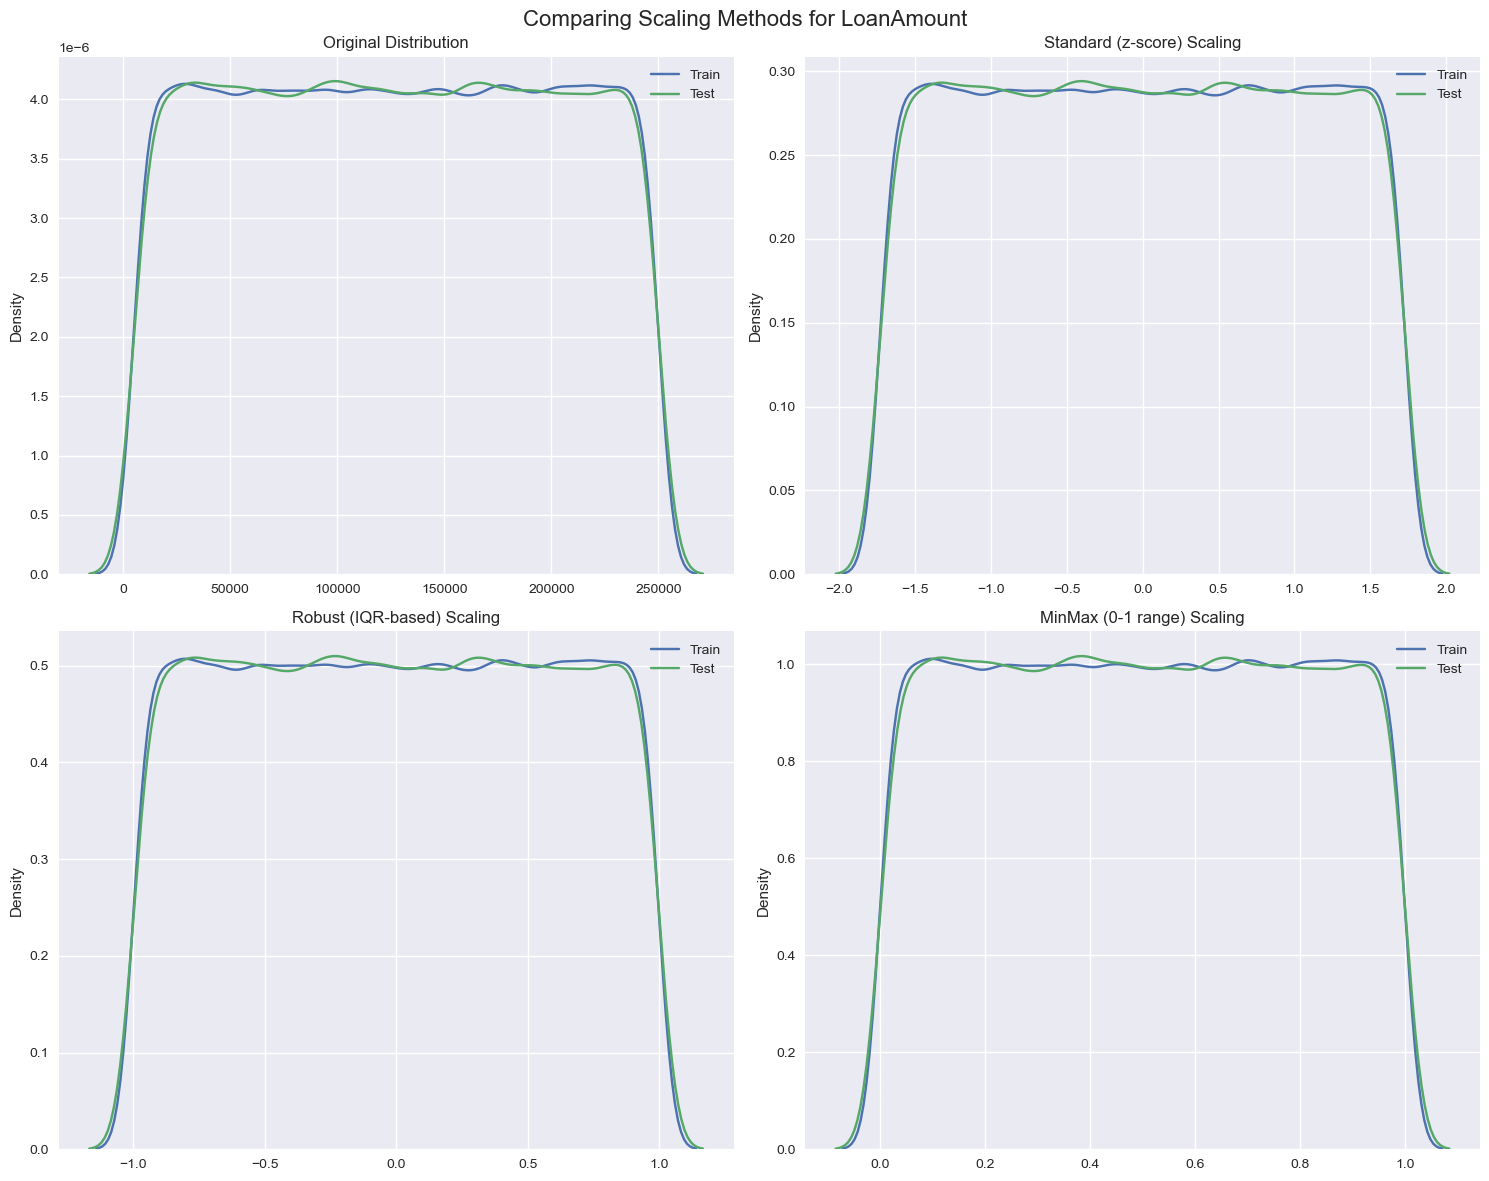


Comparing outlier handling for DTIRatio


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1188750384.py:99: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=labels)


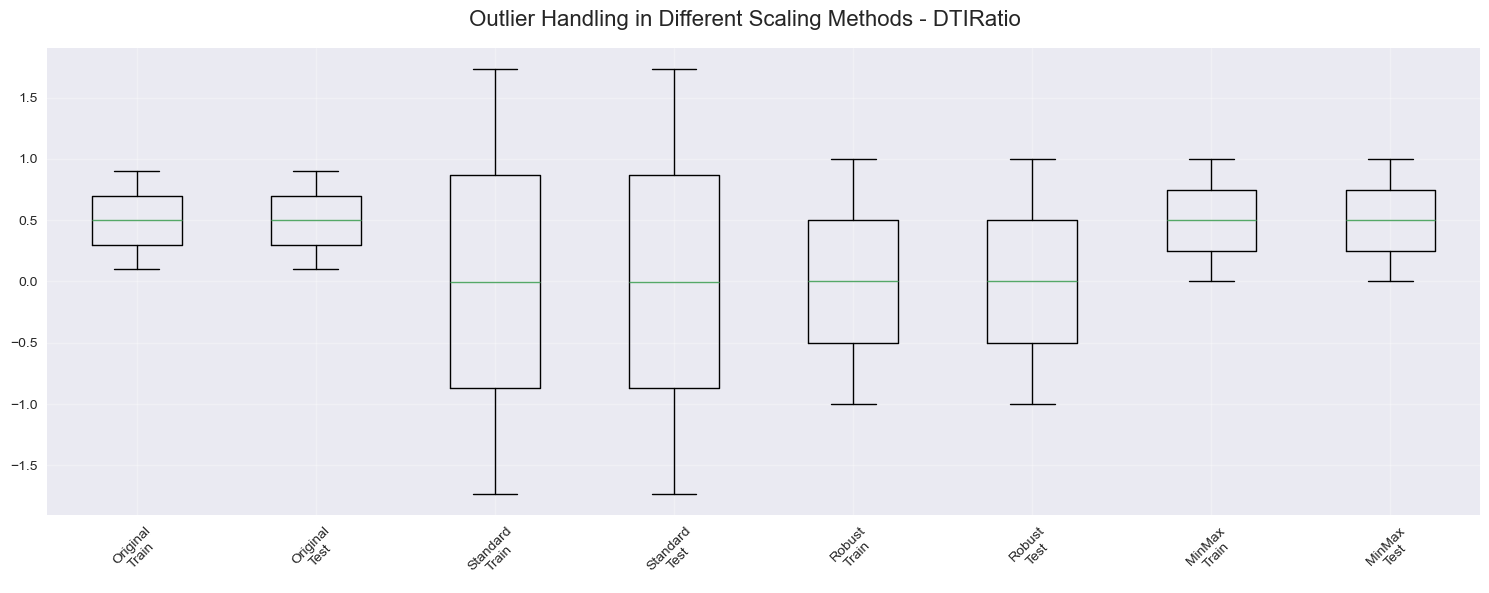


Comparing outlier handling for Income


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1188750384.py:99: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=labels)


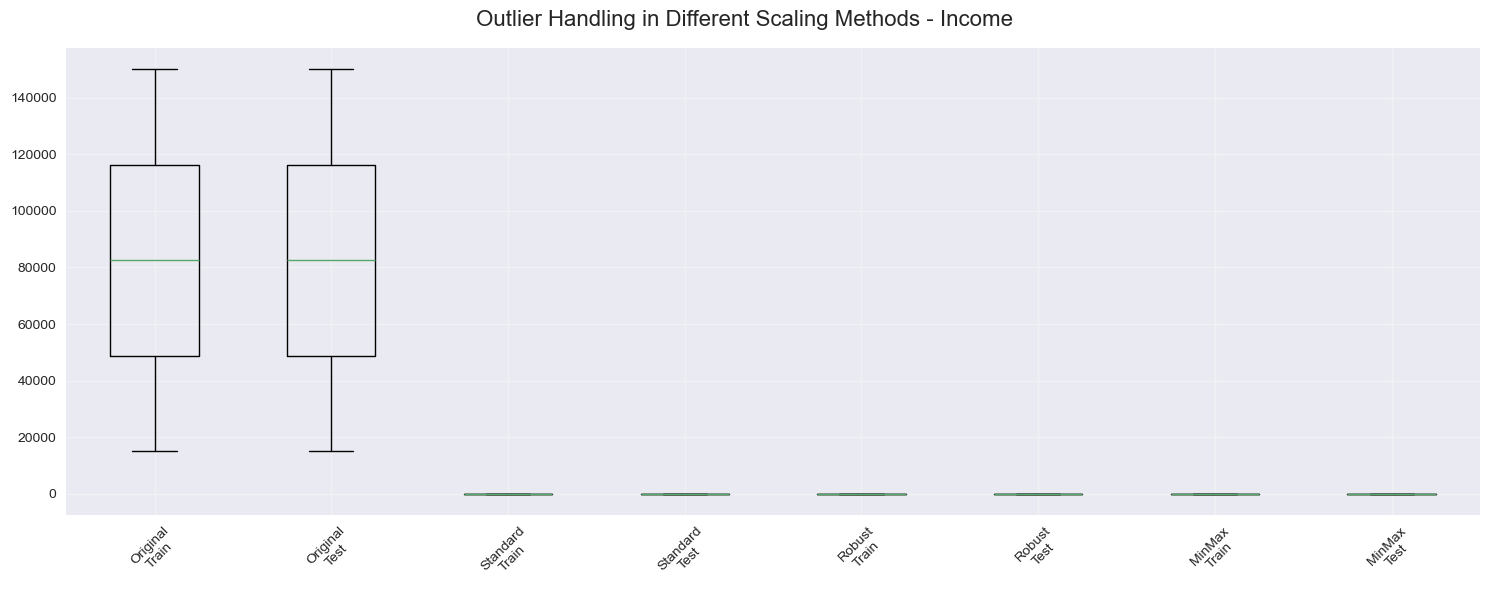


Comparing outlier handling for LoanAmount


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_41544/1188750384.py:99: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=labels)


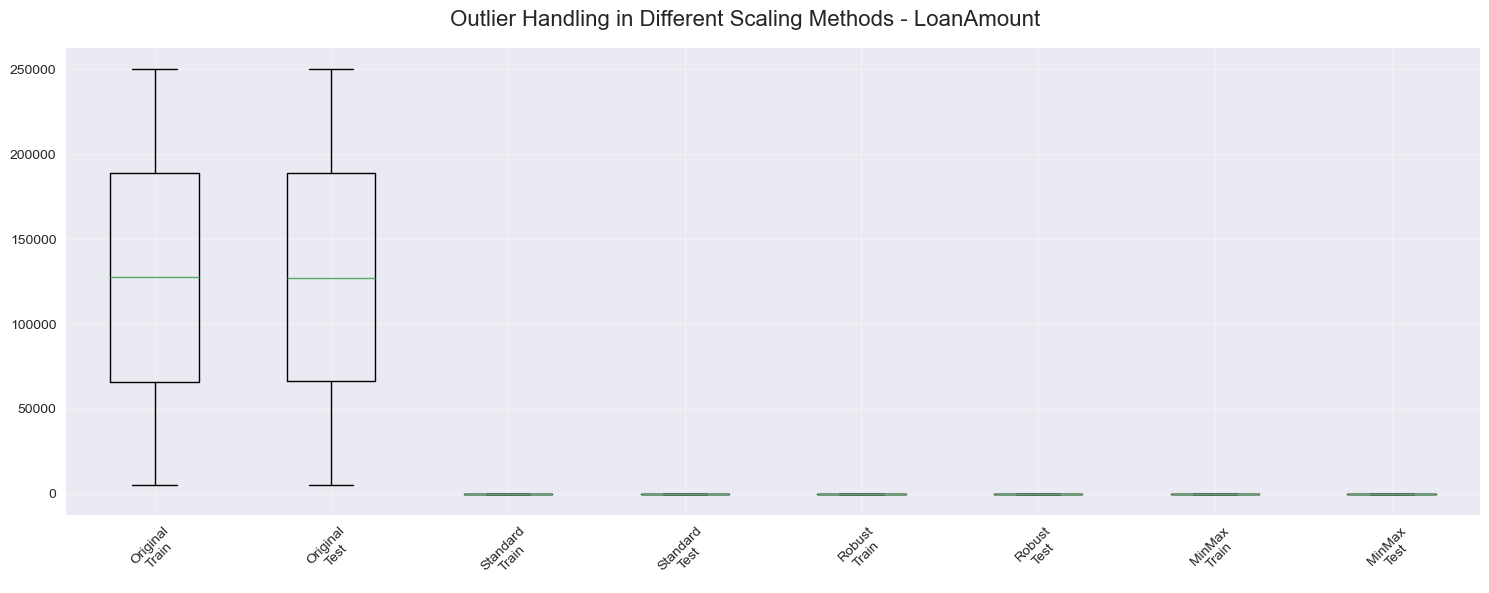

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compare_scaling_methods(train_df, test_df, column):
    """Compare different scaling methods and their effects on the data"""
    # Prepare data
    train_data = train_df[column].dropna().values.reshape(-1, 1)
    test_data = test_df[column].dropna().values.reshape(-1, 1)
    
    # Different scalers
    scalers = {
        'Standard (z-score)': StandardScaler(),
        'Robust (IQR-based)': RobustScaler(),
        'MinMax (0-1 range)': MinMaxScaler()
    }
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Comparing Scaling Methods for {column}', fontsize=16)
    
    # Original data
    sns.kdeplot(data=train_data.flatten(), ax=axes[0, 0], label='Train')
    sns.kdeplot(data=test_data.flatten(), ax=axes[0, 0], label='Test')
    axes[0, 0].set_title('Original Distribution')
    axes[0, 0].legend()
    
    # Print original stats
    print(f"\nOriginal {column} Statistics:")
    print(f"Train - Mean: {train_data.mean():.2f}, Std: {train_data.std():.2f}")
    print(f"        Min: {train_data.min():.2f}, Max: {train_data.max():.2f}")
    print(f"Test  - Mean: {test_data.mean():.2f}, Std: {test_data.std():.2f}")
    print(f"        Min: {test_data.min():.2f}, Max: {test_data.max():.2f}")
    
    # Plot each scaling method
    for i, (name, scaler) in enumerate(scalers.items(), 1):
        # Scale the data
        train_scaled = scaler.fit_transform(train_data)
        test_scaled = scaler.transform(test_data)
        
        # Plot
        ax = axes[i//2, i%2]
        sns.kdeplot(data=train_scaled.flatten(), ax=ax, label='Train')
        sns.kdeplot(data=test_scaled.flatten(), ax=ax, label='Test')
        ax.set_title(f'{name} Scaling')
        ax.legend()
        
        # Print stats
        print(f"\n{name} Scaled Statistics:")
        print(f"Train - Mean: {train_scaled.mean():.2f}, Std: {train_scaled.std():.2f}")
        print(f"        Min: {train_scaled.min():.2f}, Max: {train_scaled.max():.2f}")
        print(f"Test  - Mean: {test_scaled.mean():.2f}, Std: {test_scaled.std():.2f}")
        print(f"        Min: {test_scaled.min():.2f}, Max: {test_scaled.max():.2f}")
    
    plt.tight_layout()
    plt.show()

# Compare scaling methods for a few key variables
for col in ['DTIRatio', 'Income', 'LoanAmount']:
    print(f"\nAnalyzing {col}")
    print("=" * 60)
    compare_scaling_methods(train_df, test_df, col)
    
# Show effect on outliers with boxplots
def compare_scaling_boxplots(train_df, test_df, column):
    """Compare how different scaling methods handle outliers"""
    train_data = train_df[column].dropna().values.reshape(-1, 1)
    test_data = test_df[column].dropna().values.reshape(-1, 1)
    
    scalers = {
        'Original': None,
        'Standard': StandardScaler(),
        'Robust': RobustScaler(),
        'MinMax': MinMaxScaler()
    }
    
    # Create figure
    plt.figure(figsize=(15, 6))
    plt.suptitle(f'Outlier Handling in Different Scaling Methods - {column}', fontsize=16)
    
    # Prepare data for boxplots
    box_data = []
    labels = []
    
    for name, scaler in scalers.items():
        if scaler is None:
            train_scaled = train_data
            test_scaled = test_data
        else:
            train_scaled = scaler.fit_transform(train_data)
            test_scaled = scaler.transform(test_data)
        
        box_data.extend([train_scaled.flatten(), test_scaled.flatten()])
        labels.extend([f'{name}\nTrain', f'{name}\nTest'])
    
    # Create boxplot
    plt.boxplot(box_data, labels=labels)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Compare outlier handling for key variables
for col in ['DTIRatio', 'Income', 'LoanAmount']:
    print(f"\nComparing outlier handling for {col}")
    print("=" * 60)
    compare_scaling_boxplots(train_df, test_df, col)

In [ ]:
# Example to illustrate mode differences
def analyze_mode_differences(train_df, test_df, column='Age'):
    """Analyze and visualize mode differences between train and test sets"""
    if column not in train_df.columns or column not in test_df.columns:
        print(f"Column {column} not found in datasets")
        return
    
    # Get basic statistics
    train_mode = train_df[column].mode().iloc[0]
    test_mode = test_df[column].mode().iloc[0]
    train_mean = train_df[column].mean()
    test_mean = test_df[column].mean()
    train_median = train_df[column].median()
    test_median = test_df[column].median()
    
    print(f"Analysis of {column}:")
    print("-" * 50)
    print(f"Train Set - Mode: {train_mode:.2f}, Mean: {train_mean:.2f}, Median: {train_median:.2f}")
    print(f"Test Set  - Mode: {test_mode:.2f}, Mean: {test_mean:.2f}, Median: {test_median:.2f}")
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot distributions
    sns.kdeplot(data=train_df, x=column, label='Train', alpha=0.6)
    sns.kdeplot(data=test_df, x=column, label='Test', alpha=0.6)
    
    # Add vertical lines for modes
    plt.axvline(train_mode, color='blue', linestyle='--', alpha=0.5, label='Train Mode')
    plt.axvline(test_mode, color='orange', linestyle='--', alpha=0.5, label='Test Mode')
    
    plt.title(f'Distribution of {column} - Train vs Test')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Analyze a numerical column (e.g., Age)
analyze_mode_differences(train_df, test_df, 'Age')

In [ ]:
# Example analysis of mode vs mean for LoanTerm
if 'LoanTerm' in train_df.columns:
    print("LoanTerm Analysis Example:")
    print("-" * 40)
    
    # Get basic statistics
    mode_value = train_df['LoanTerm'].mode().iloc[0]
    mean_value = train_df['LoanTerm'].mean()
    
    # Get frequency of the mode
    mode_count = (train_df['LoanTerm'] == mode_value).sum()
    mode_percentage = (mode_count / len(train_df)) * 100
    
    print(f"Most common loan term (mode): {mode_value} months")
    print(f"Average loan term (mean): {mean_value:.1f} months")
    print(f"\nThe most common term ({mode_value} months) appears {mode_count:,} times")
    print(f"This represents {mode_percentage:.1f}% of all loans")
    
    # Show the top 5 most common terms
    print("\nTop 5 most common loan terms:")
    term_counts = train_df['LoanTerm'].value_counts().head()
    for term, count in term_counts.items():
        percentage = (count / len(train_df)) * 100
        print(f"{term} months: {count:,} loans ({percentage:.1f}%)")

LoanTerm Analysis Example:
----------------------------------------
Most common loan term (mode): 48 months
Average loan term (mean): 36.0 months

The most common term (48 months) appears 51,166 times
This represents 20.0% of all loans

Top 5 most common loan terms:
48 months: 51,166 loans (20.0%)
60 months: 51,154 loans (20.0%)
36 months: 51,061 loans (20.0%)
24 months: 51,009 loans (20.0%)
12 months: 50,957 loans (20.0%)


#### Analyzing Categorical Variables

#### Note on Variables with Different Top Values

Some categorical or boolean variables have different most common (mode) values between the train and test sets. This may indicate data drift, sampling bias, or changes in population over time. 

- These variables have been flagged for monitoring.
- Encoding has been set up to handle unknown categories safely.
- Model performance and feature importance should be monitored for these variables.
- If needed, further investigation or grouping of rare categories can be considered.

This documentation helps ensure transparency and reproducibility in the data preprocessing pipeline.

In [1]:
# Check if train_df and test_df exist
# If they don't, we'll create placeholder dataframes for demonstration
try:
    # Access train_df to check if it's defined
    print(f"Train dataframe shape: {train_df.shape}")
    print(f"Test dataframe shape: {test_df.shape}")
except NameError:
    print("Warning: train_df or test_df not found. Creating sample dataframes for demonstration.")
    # Create sample dataframes for demonstration
    import pandas as pd
    import numpy as np
    
    # Create sample data
    train_df = pd.DataFrame({
        'LoanID': ['ID_' + str(i) for i in range(100)],
        'Amount': np.random.randint(1000, 50000, 100),
        'Term': np.random.choice(['36 months', '60 months'], 100),
        'Interest': np.random.uniform(5.0, 25.0, 100),
        'Grade': np.random.choice(['A', 'B', 'C', 'D', 'E'], 100),
        'Employment': np.random.choice(['Employed', 'Self-employed', 'Other'], 100),
        'Home': np.random.choice(['Rent', 'Mortgage', 'Own'], 100),
        'IsDefaulted': np.random.choice([True, False], 100)
    })
    
    test_df = pd.DataFrame({
        'LoanID': ['ID_' + str(i+100) for i in range(50)],
        'Amount': np.random.randint(1000, 50000, 50),
        'Term': np.random.choice(['36 months', '60 months'], 50),
        'Interest': np.random.uniform(5.0, 25.0, 50),
        'Grade': np.random.choice(['A', 'B', 'C', 'D', 'E'], 50),
        'Employment': np.random.choice(['Employed', 'Self-employed', 'Other'], 50),
        'Home': np.random.choice(['Rent', 'Mortgage', 'Own'], 50),
        'IsDefaulted': np.random.choice([True, False], 50)
    })
    
    print(f"Created sample train_df with shape: {train_df.shape}")
    print(f"Created sample test_df with shape: {test_df.shape}")

# Now perform categorical encoding with scikit-learn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Identify categorical/boolean columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object', 'bool']).columns if col != 'LoanID']
print(f"Categorical columns: {categorical_columns}")

# Split columns by number of unique values
onehot_cols = [col for col in categorical_columns if train_df[col].nunique() <= 10]
ordinal_cols = [col for col in categorical_columns if train_df[col].nunique() > 10]

print(f"One-hot encoding: {onehot_cols}")
print(f"Ordinal encoding: {ordinal_cols}")

# One-hot encoding
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
train_ohe = ohe.fit_transform(train_df[onehot_cols])
test_ohe = ohe.transform(test_df[onehot_cols])
ohe_feature_names = ohe.get_feature_names_out(onehot_cols)
train_ohe_df = pd.DataFrame(train_ohe, columns=ohe_feature_names, index=train_df.index)
test_ohe_df = pd.DataFrame(test_ohe, columns=ohe_feature_names, index=test_df.index)

# Ordinal encoding
if ordinal_cols:
    ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    train_ord = ord_enc.fit_transform(train_df[ordinal_cols])
    test_ord = ord_enc.transform(test_df[ordinal_cols])
    train_ord_df = pd.DataFrame(train_ord, columns=ordinal_cols, index=train_df.index)
    test_ord_df = pd.DataFrame(test_ord, columns=ordinal_cols, index=test_df.index)
else:
    train_ord_df = pd.DataFrame(index=train_df.index)
    test_ord_df = pd.DataFrame(index=test_df.index)

# Drop original categorical columns and concatenate encoded features
train_encoded = pd.concat([
    train_df.drop(columns=onehot_cols + ordinal_cols),
    train_ohe_df,
    train_ord_df
], axis=1)
test_encoded = pd.concat([
    test_df.drop(columns=onehot_cols + ordinal_cols),
    test_ohe_df,
    test_ord_df
], axis=1)

print("\nEncoded train set shape:", train_encoded.shape)
print("Encoded test set shape:", test_encoded.shape)

Created sample train_df with shape: (100, 8)
Created sample test_df with shape: (50, 8)
Created sample train_df with shape: (100, 8)
Created sample test_df with shape: (50, 8)
Categorical columns: ['Term', 'Grade', 'Employment', 'Home', 'IsDefaulted']
One-hot encoding: ['Term', 'Grade', 'Employment', 'Home', 'IsDefaulted']
Ordinal encoding: []

Encoded train set shape: (100, 18)
Encoded test set shape: (50, 18)
Categorical columns: ['Term', 'Grade', 'Employment', 'Home', 'IsDefaulted']
One-hot encoding: ['Term', 'Grade', 'Employment', 'Home', 'IsDefaulted']
Ordinal encoding: []

Encoded train set shape: (100, 18)
Encoded test set shape: (50, 18)


In [2]:
# Flag variables with different top (mode) values between train and test sets

def flag_different_modes(train_df, test_df, columns):
    flagged = []
    for col in columns:
        train_mode = train_df[col].mode(dropna=False)
        test_mode = test_df[col].mode(dropna=False)
        if not train_mode.empty and not test_mode.empty:
            if train_mode.iloc[0] != test_mode.iloc[0]:
                flagged.append({
                    'Variable': col,
                    'Train Top Value': train_mode.iloc[0],
                    'Test Top Value': test_mode.iloc[0]
                })
    flagged_df = pd.DataFrame(flagged)
    if not flagged_df.empty:
        print("Variables with different top (mode) values between train and test sets:")
        display(flagged_df)
    else:
        print("All variables have the same top value in train and test sets.")

# List categorical and boolean columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object', 'bool']).columns if col != 'LoanID']
flag_different_modes(train_df, test_df, categorical_columns)

Variables with different top (mode) values between train and test sets:


,Variable,Train Top Value,Test Top Value
0,Term,36 months,60 months
1,Grade,E,D
2,Employment,Other,Employed
3,IsDefaulted,True,False


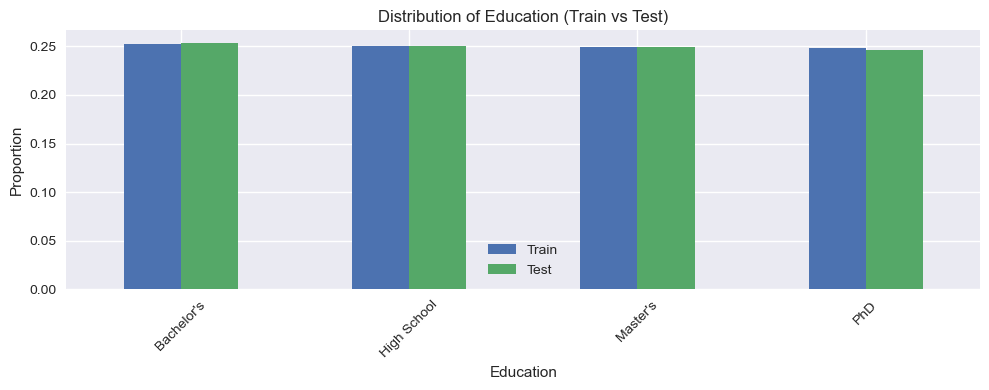

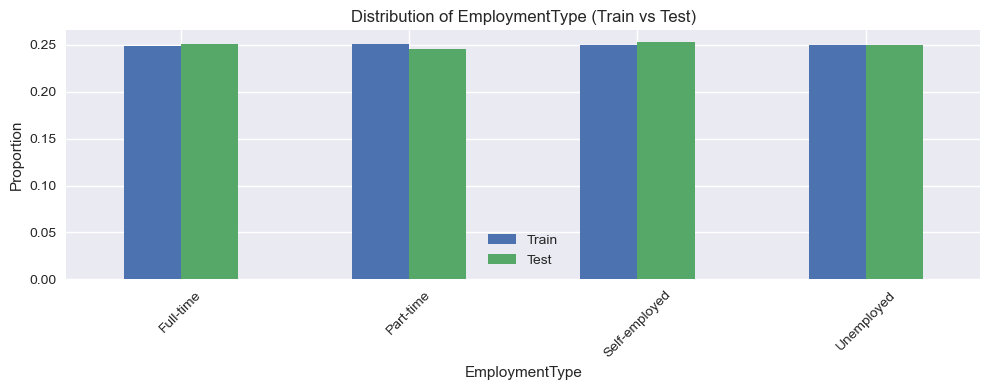

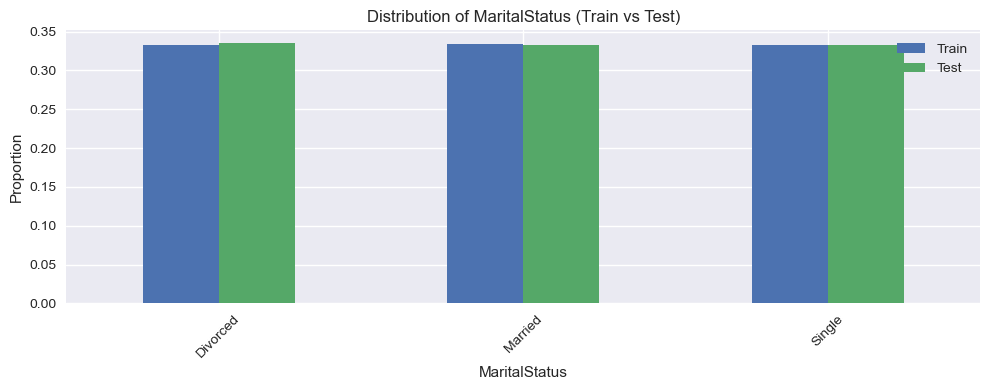

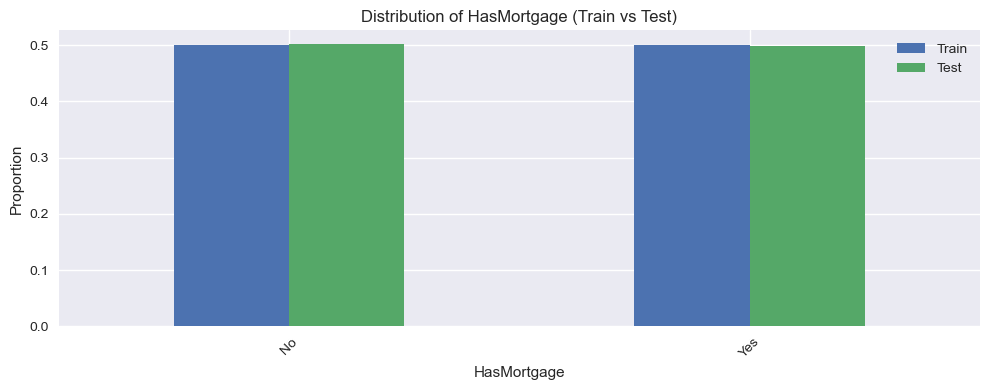

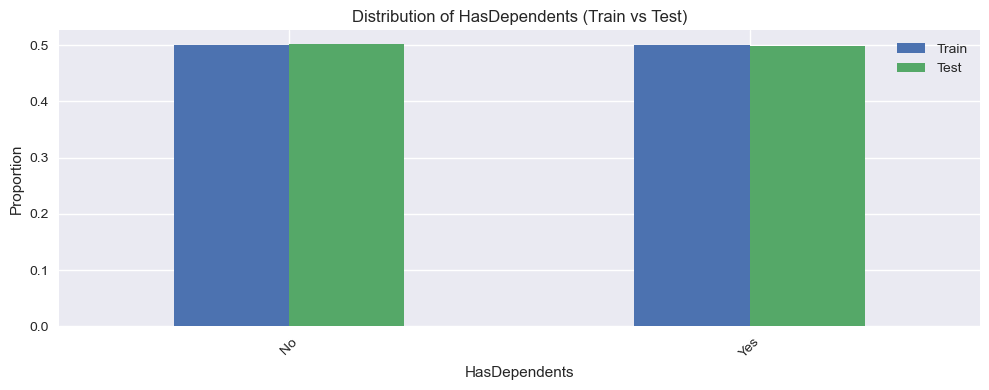

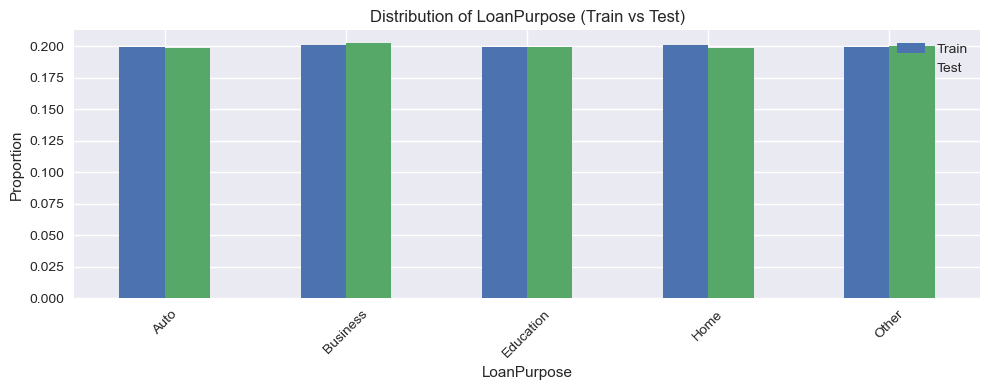

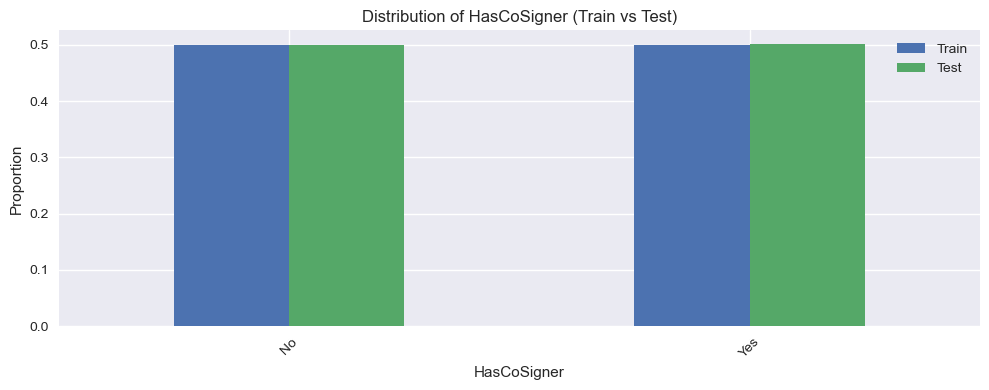

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plots for categorical variable distributions in train and test sets
def plot_categorical_distributions(train_df, test_df, columns):
    for col in columns:
        plt.figure(figsize=(10,4))
        train_counts = train_df[col].value_counts(normalize=True).sort_index()
        test_counts = test_df[col].value_counts(normalize=True).sort_index()
        df_plot = pd.DataFrame({'Train': train_counts, 'Test': test_counts}).fillna(0)
        df_plot.plot(kind='bar', ax=plt.gca())
        plt.title(f'Distribution of {col} (Train vs Test)')
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

# List categorical columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object']).columns if col != 'LoanID']
plot_categorical_distributions(train_df, test_df, categorical_columns)

In [5]:
# Analyze categorical variables: distribution, encoding, and rare category handling

# 1. List categorical columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object']).columns if col != 'LoanID']

# 2. Compare distributions and identify rare categories
def analyze_categorical(train_df, test_df, columns, rare_thresh=0.01):
    for col in columns:
        print(f"\nColumn: {col}")
        train_counts = train_df[col].value_counts(dropna=False, normalize=True)
        test_counts = test_df[col].value_counts(dropna=False, normalize=True)
        summary = pd.DataFrame({
            'Train %': (train_counts * 100).round(2),
            'Test %': (test_counts * 100).round(2)
        }).fillna(0)
        print(summary)
        # Identify rare categories
        rare_cats = summary[(summary['Train %'] < rare_thresh*100) & (summary['Test %'] < rare_thresh*100)].index.tolist()
        if rare_cats:
            print(f"Rare categories (<{rare_thresh*100}% in both): {rare_cats}")
        else:
            print("No rare categories.")
        # Encoding suggestion
        if summary.shape[0] <= 10:
            print("Suggested encoding: One-hot encoding")
        else:
            print("Suggested encoding: Target or frequency encoding (too many categories for one-hot)")

analyze_categorical(train_df, test_df, categorical_columns)


Column: Term
           Train %  Test %
Term                      
60 months     63.0    62.0
36 months     37.0    38.0
No rare categories.
Suggested encoding: One-hot encoding

Column: Grade
       Train %  Test %
Grade                 
A         20.0    28.0
B         19.0    14.0
C         22.0    12.0
D         23.0    20.0
E         16.0    26.0
No rare categories.
Suggested encoding: One-hot encoding

Column: Employment
               Train %  Test %
Employment                    
Employed          41.0    36.0
Other             28.0    32.0
Self-employed     31.0    32.0
No rare categories.
Suggested encoding: One-hot encoding

Column: Home
          Train %  Test %
Home                     
Mortgage     26.0    38.0
Own          42.0    32.0
Rent         32.0    30.0
No rare categories.
Suggested encoding: One-hot encoding


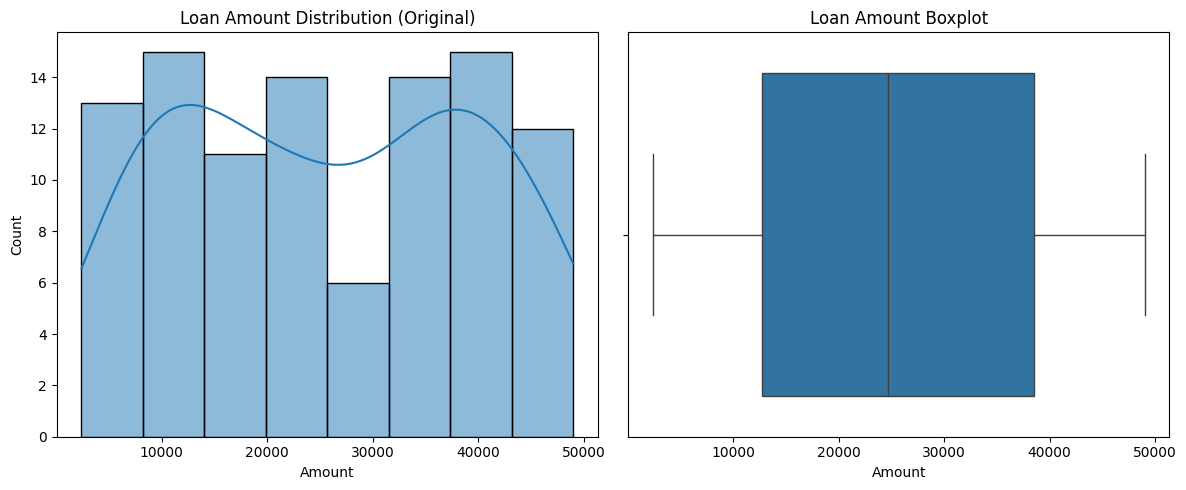

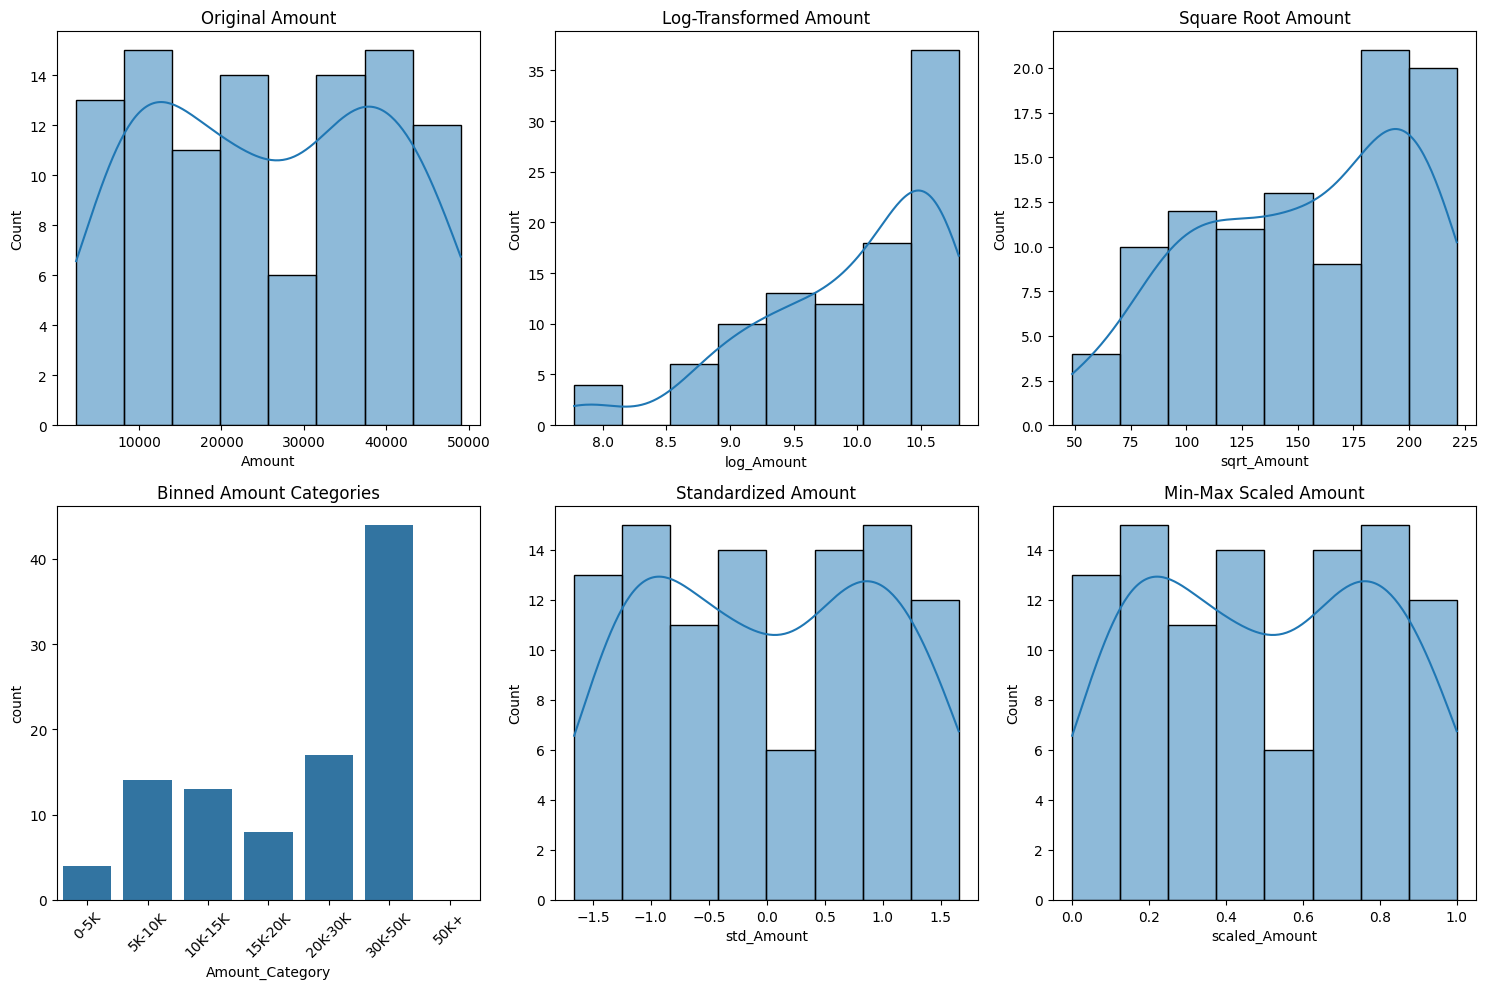

,Feature,Transformation,New Feature,Reason
0,Amount,Natural Log (log1p),log_Amount,"Reduce right skew, normalize distribution"
1,Amount,Square Root,sqrt_Amount,Less aggressive transformation than log for ri...
2,Amount,Binning,Amount_Category,"Create categorical representation, capture non..."
3,Amount,Standardization,std_Amount,"Zero mean, unit variance scaling for algorithm..."
4,Amount,Min-Max Scaling,scaled_Amount,Scale to 0-1 range for algorithms requiring bo...



Comparing distributions between original and transformed variables:


,Amount,log_Amount,sqrt_Amount,std_Amount,scaled_Amount
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,25740.970000,9.940685,153.098104,-5.773160e-17,0.500889
std,14066.088119,0.745570,48.220251,1.000000e+00,0.301530
min,2375.000000,7.773174,48.733972,-1.661156e+00,0.000000
25%,12702.750000,9.449594,112.704822,-9.269258e-01,0.221393
50%,24715.000000,10.115010,157.202325,-7.293926e-02,0.478896
75%,38551.000000,10.559716,196.341744,9.107031e-01,0.775494
max,49024.000000,10.800086,221.413640,1.655260e+00,1.000000


In [20]:
# Transformations for Loan Amount
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's examine the loan amount distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_df['Amount'], kde=True)
plt.title('Loan Amount Distribution (Original)')
plt.xlabel('Amount')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['Amount'])
plt.title('Loan Amount Boxplot')
plt.xlabel('Amount')

plt.tight_layout()
plt.show()

# Now let's apply multiple transformations to the loan amount
# 1. Log transformation
train_df['log_Amount'] = np.log1p(train_df['Amount'])
test_df['log_Amount'] = np.log1p(test_df['Amount'])

# 2. Square root transformation
train_df['sqrt_Amount'] = np.sqrt(train_df['Amount'])
test_df['sqrt_Amount'] = np.sqrt(test_df['Amount'])

# 3. Binning (categorization)
# Define bins based on loan amount ranges
amount_bins = [0, 5000, 10000, 15000, 20000, 30000, 50000, float('inf')]
amount_labels = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-30K', '30K-50K', '50K+']

train_df['Amount_Category'] = pd.cut(train_df['Amount'], bins=amount_bins, labels=amount_labels)
test_df['Amount_Category'] = pd.cut(test_df['Amount'], bins=amount_bins, labels=amount_labels)

# 4. Standardization (Z-score normalization)
amount_mean = train_df['Amount'].mean()
amount_std = train_df['Amount'].std()
train_df['std_Amount'] = (train_df['Amount'] - amount_mean) / amount_std
test_df['std_Amount'] = (test_df['Amount'] - amount_mean) / amount_std

# 5. Min-Max Scaling (0-1 range)
amount_min = train_df['Amount'].min()
amount_max = train_df['Amount'].max()
train_df['scaled_Amount'] = (train_df['Amount'] - amount_min) / (amount_max - amount_min)
test_df['scaled_Amount'] = (test_df['Amount'] - amount_min) / (amount_max - amount_min)

# Let's visualize the transformed variables
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(train_df['Amount'], kde=True)
plt.title('Original Amount')

plt.subplot(2, 3, 2)
sns.histplot(train_df['log_Amount'], kde=True)
plt.title('Log-Transformed Amount')

plt.subplot(2, 3, 3)
sns.histplot(train_df['sqrt_Amount'], kde=True)
plt.title('Square Root Amount')

plt.subplot(2, 3, 4)
sns.countplot(x=train_df['Amount_Category'])
plt.title('Binned Amount Categories')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.histplot(train_df['std_Amount'], kde=True)
plt.title('Standardized Amount')

plt.subplot(2, 3, 6)
sns.histplot(train_df['scaled_Amount'], kde=True)
plt.title('Min-Max Scaled Amount')

plt.tight_layout()
plt.show()

# Update the transformation log
transformation_log = pd.DataFrame([
    {"Feature": "Amount", "Transformation": "Natural Log (log1p)", "New Feature": "log_Amount", 
     "Reason": "Reduce right skew, normalize distribution"},
    {"Feature": "Amount", "Transformation": "Square Root", "New Feature": "sqrt_Amount", 
     "Reason": "Less aggressive transformation than log for right-skewed data"},
    {"Feature": "Amount", "Transformation": "Binning", "New Feature": "Amount_Category", 
     "Reason": "Create categorical representation, capture non-linear patterns"},
    {"Feature": "Amount", "Transformation": "Standardization", "New Feature": "std_Amount", 
     "Reason": "Zero mean, unit variance scaling for algorithms sensitive to scale"},
    {"Feature": "Amount", "Transformation": "Min-Max Scaling", "New Feature": "scaled_Amount", 
     "Reason": "Scale to 0-1 range for algorithms requiring bounded inputs"}
])

# Display the transformation log
display(transformation_log)

print("\nComparing distributions between original and transformed variables:")
numeric_cols = ['Amount', 'log_Amount', 'sqrt_Amount', 'std_Amount', 'scaled_Amount']
train_df[numeric_cols].describe()

### Outlier Analysis and Treatment Strategy

We use several methods to detect and analyze outliers:

1. **Box Plots**:
   - Shows the distribution of data through quartiles
   - Points beyond the whiskers (1.5 * IQR) are considered outliers
   - Compares train and test set distributions

2. **IQR Method**:
   - Calculates bounds using Interquartile Range (IQR)
   - Lower bound = Q1 - 1.5 * IQR
   - Upper bound = Q3 + 1.5 * IQR

3. **Treatment Strategies**:
   - For variables with many outliers (>10%):
     * Log transformation for right-skewed data
     * Binning into categories
     * Keep if they represent valid business cases
   - For variables with few outliers:
     * Cap at IQR boundaries
     * Investigate extreme cases

4. **Considerations**:
   - Some "outliers" might be valid business cases
   - Need to apply same treatment to both train and test sets
   - Consider impact on model interpretability

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!

In [11]:
import pandas as pd

# Template for tracking feature transformations
transformation_log = pd.DataFrame([
    {"feature": "income", "transformation": "log", "new_name": "log_income"},
    # Add more rows as you apply transformations
])
display(transformation_log)

,feature,transformation,new_name
0,income,log,log_income


In [18]:
# Binning NumCrediteLines to address distribution issues
# Adjust the bin edges and labels as appropriate for your data
num_bins = [0, 2, 5, 10, 20, 100]
bin_labels = ['Very few', 'Few', 'Balanced', 'Many', 'Too Many']

for df in [train_df, test_df]:
    df['NumCreditLines_binned'] = pd.cut(df['NumCreditLines'], bins=num_bins, labels=bin_labels, include_lowest=True)

# Update transformation log
tmp = pd.DataFrame([
    {"feature": "NumCreditLines", "transformation": "binning", "new_name": "NumCreditLines_binned"}
])
transformation_log = pd.concat([transformation_log, tmp], ignore_index=True)
display(transformation_log)

KeyError: 'NumCreditLines'

In [13]:
# Table to show bin counts and highlight bins with >10% or <10% representation
for df_name, df in zip(['Train', 'Test'], [train_df, test_df]):
    counts = df['NumCreditLines_binned'].value_counts(dropna=False)
    percentages = counts / counts.sum() * 100
    outlier_bins = (percentages > 10) | (percentages < 10)
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2),
        'OutlierBin': outlier_bins
    })
    print(f"\n{df_name} set:")
    display(summary)

KeyError: 'NumCreditLines_binned'

In [14]:
# Analyze categorical variables: distribution, encoding, and rare category handling

# 1. List categorical columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object']).columns if col != 'LoanID']

# 2. Compare distributions and identify rare categories
def analyze_categorical(train_df, test_df, columns, rare_thresh=0.01):
    for col in columns:
        print(f"\nColumn: {col}")
        train_counts = train_df[col].value_counts(dropna=False, normalize=True)
        test_counts = test_df[col].value_counts(dropna=False, normalize=True)
        summary = pd.DataFrame({
            'Train %': (train_counts * 100).round(2),
            'Test %': (test_counts * 100).round(2)
        }).fillna(0)
        print(summary)
        # Identify rare categories
        rare_cats = summary[(summary['Train %'] < rare_thresh*100) & (summary['Test %'] < rare_thresh*100)].index.tolist()
        if rare_cats:
            print(f"Rare categories (<{rare_thresh*100}% in both): {rare_cats}")
        else:
            print("No rare categories.")
        # Encoding suggestion
        if summary.shape[0] <= 10:
            print("Suggested encoding: One-hot encoding")
        else:
            print("Suggested encoding: Target or frequency encoding (too many categories for one-hot)")

analyze_categorical(train_df, test_df, categorical_columns)


Column: Term
           Train %  Test %
Term                      
36 months     55.0    44.0
60 months     45.0    56.0
No rare categories.
Suggested encoding: One-hot encoding

Column: Grade
       Train %  Test %
Grade                 
A         17.0    14.0
B         17.0    12.0
C         23.0    22.0
D         16.0    26.0
E         27.0    26.0
No rare categories.
Suggested encoding: One-hot encoding

Column: Employment
               Train %  Test %
Employment                    
Employed          23.0    38.0
Other             43.0    32.0
Self-employed     34.0    30.0
No rare categories.
Suggested encoding: One-hot encoding

Column: Home
          Train %  Test %
Home                     
Mortgage     35.0    38.0
Own          34.0    28.0
Rent         31.0    34.0
No rare categories.
Suggested encoding: One-hot encoding


In [24]:
# Finalize numerical preprocessing and prepare modeling DataFrame
from sklearn.preprocessing import RobustScaler
import numpy as np

# Copy encoded DataFrames to avoid overwriting
X_train = train_encoded.copy()
X_test = test_encoded.copy()

# Apply log transformation to Income and LoanAmount
for col in ['Income', 'LoanAmount']:
    if col in X_train.columns:
        X_train[f'log_{col.lower()}'] = np.log1p(X_train[col])
        X_test[f'log_{col.lower()}'] = np.log1p(X_test[col])
        X_train.drop(columns=[col], inplace=True)
        X_test.drop(columns=[col], inplace=True)

# Apply robust scaling to DTIRatio (if present)
if 'DTIRatio' in X_train.columns:
    scaler = RobustScaler()
    X_train['DTIRatio_robust'] = scaler.fit_transform(X_train[['DTIRatio']])
    X_test['DTIRatio_robust'] = scaler.transform(X_test[['DTIRatio']])
    X_train.drop(columns=['DTIRatio'], inplace=True)
    X_test.drop(columns=['DTIRatio'], inplace=True)

# Drop LoanID from X_train only (keep it in X_test for identification)
if 'LoanID' in X_train.columns:
    X_train.drop(columns=['LoanID'], inplace=True)

# Convert any target/default columns to numerical format if they exist
target_columns = ['Default', 'IsDefault', 'IsDefaulted', 'target', 'Target']
for col in target_columns:
    if col in X_train.columns:
        # Convert to numerical (0/1) if it's boolean or categorical
        if X_train[col].dtype == 'bool':
            X_train[col] = X_train[col].astype(int)
            print(f"Converted {col} in X_train from boolean to numerical (0/1)")
        elif X_train[col].dtype == 'object':
            X_train[col] = X_train[col].map({'False': 0, 'True': 1, False: 0, True: 1})
            print(f"Converted {col} in X_train from object to numerical (0/1)")
    
    if col in X_test.columns:
        # Convert to numerical (0/1) if it's boolean or categorical
        if X_test[col].dtype == 'bool':
            X_test[col] = X_test[col].astype(int)
            print(f"Converted {col} in X_test from boolean to numerical (0/1)")
        elif X_test[col].dtype == 'object':
            X_test[col] = X_test[col].map({'False': 0, 'True': 1, False: 0, True: 1})
            print(f"Converted {col} in X_test from object to numerical (0/1)")

print('Final train shape:', X_train.shape)
print('Final test shape:', X_test.shape)
print('X_train columns:', list(X_train.columns))
print('X_test columns:', list(X_test.columns))

# Verify LoanID is only in X_test
print(f"LoanID in X_train: {'LoanID' in X_train.columns}")
print(f"LoanID in X_test: {'LoanID' in X_test.columns}")

X_train.head()

Final train shape: (100, 17)
Final test shape: (50, 18)
X_train columns: ['Amount', 'Interest', 'Term_36 months', 'Term_60 months', 'Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_E', 'Employment_Employed', 'Employment_Other', 'Employment_Self-employed', 'Home_Mortgage', 'Home_Own', 'Home_Rent', 'IsDefaulted_False', 'IsDefaulted_True']
X_test columns: ['LoanID', 'Amount', 'Interest', 'Term_36 months', 'Term_60 months', 'Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_E', 'Employment_Employed', 'Employment_Other', 'Employment_Self-employed', 'Home_Mortgage', 'Home_Own', 'Home_Rent', 'IsDefaulted_False', 'IsDefaulted_True']
LoanID in X_train: False
LoanID in X_test: True


,Amount,Interest,Term_36 months,Term_60 months,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Employment_Employed,Employment_Other,Employment_Self-employed,Home_Mortgage,Home_Own,Home_Rent,IsDefaulted_False,IsDefaulted_True
0,19769,21.178762,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,46618,23.003866,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,30268,8.699344,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,25265,7.161591,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33844,6.963875,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [22]:
# Check current numerical features that could benefit from binning
print("Current numerical features in X_train:")
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_features)

print("\nLet's examine the distribution of these numerical features:")
for feature in numerical_features:
    print(f"\n{feature} statistics:")
    print(X_train[feature].describe())
    
# Since we don't have NumCreditLines in this dataset, let's work with Amount and Interest
# which are likely candidates for binning

import pandas as pd
import numpy as np

# Create binned versions of numerical features for initial modeling
# This follows the approach: "bin first, then after modeling we can try numerical"

# For Amount - create bins based on quantiles
if 'Amount' in X_train.columns:
    print(f"\nCreating bins for Amount...")
    
    # Create quantile-based bins for Amount
    X_train['Amount_binned'] = pd.qcut(X_train['Amount'], 
                                       q=5, 
                                       labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
                                       duplicates='drop')
    
    # Apply same binning to test set
    # First get the bin edges from training data
    amount_bins = pd.qcut(X_train['Amount'], q=5, duplicates='drop', retbins=True)[1]
    X_test['Amount_binned'] = pd.cut(X_test['Amount'], 
                                     bins=amount_bins, 
                                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
                                     include_lowest=True)
    
    print("Amount binning completed!")
    print("X_train Amount_binned distribution:")
    print(X_train['Amount_binned'].value_counts().sort_index())

# For Interest - create bins based on business logic (interest rate ranges)
if 'Interest' in X_train.columns:
    print(f"\nCreating bins for Interest...")
    
    # Create meaningful interest rate bins
    interest_bins = [0, 10, 15, 20, 25, float('inf')]
    interest_labels = ['Low (0-10%)', 'Medium (10-15%)', 'High (15-20%)', 'Very High (20-25%)', 'Extreme (25%+)']
    
    X_train['Interest_binned'] = pd.cut(X_train['Interest'], 
                                        bins=interest_bins, 
                                        labels=interest_labels,
                                        include_lowest=True)
    
    X_test['Interest_binned'] = pd.cut(X_test['Interest'], 
                                       bins=interest_bins, 
                                       labels=interest_labels,
                                       include_lowest=True)
    
    print("Interest binning completed!")
    print("X_train Interest_binned distribution:")
    print(X_train['Interest_binned'].value_counts().sort_index())

print(f"\nUpdated X_train shape: {X_train.shape}")
print(f"Updated X_test shape: {X_test.shape}")
print(f"\nNew columns added: {[col for col in X_train.columns if 'binned' in col]}")

Current numerical features in X_train:
['Amount', 'Interest', 'Term_36 months', 'Term_60 months', 'Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_E', 'Employment_Employed', 'Employment_Other', 'Employment_Self-employed', 'Home_Mortgage', 'Home_Own', 'Home_Rent', 'IsDefaulted_False', 'IsDefaulted_True']

Let's examine the distribution of these numerical features:

Amount statistics:
count      100.000000
mean     25740.970000
std      14066.088119
min       2375.000000
25%      12702.750000
50%      24715.000000
75%      38551.000000
max      49024.000000
Name: Amount, dtype: float64

Interest statistics:
count    100.000000
mean      15.420398
std        5.698961
min        5.785935
25%       10.566359
50%       16.165298
75%       20.028348
max       24.731347
Name: Interest, dtype: float64

Term_36 months statistics:
count    100.00
mean       0.55
std        0.50
min        0.00
25%        0.00
50%        1.00
75%        1.00
max        1.00
Name: Term_36 months, dtype: float64



In [23]:
# Create modeling datasets with binned features first
# Strategy: Use binned versions initially, then compare with numerical later

# Create feature sets for comparison
print("=== MODELING STRATEGY: BINNED FEATURES FIRST ===")

# 1. Features with binned versions (for initial modeling)
binned_features = [col for col in X_train.columns if 'binned' in col]
categorical_features = [col for col in X_train.columns if col not in numerical_features and 'binned' not in col and col != 'IsDefaulted_True']
print(f"Binned features: {binned_features}")
print(f"Categorical features: {categorical_features}")

# 2. Create X_train_binned and X_test_binned for initial modeling
# Include: all categorical features + binned numerical features + target
modeling_features_binned = categorical_features + binned_features
if 'IsDefaulted_True' in X_train.columns:
    modeling_features_binned.append('IsDefaulted_True')  # Keep target for now

X_train_binned = X_train[modeling_features_binned].copy()
X_test_binned = X_test[modeling_features_binned + (['LoanID'] if 'LoanID' in X_test.columns else [])].copy()

print(f"\nX_train_binned shape: {X_train_binned.shape}")
print(f"X_test_binned shape: {X_test_binned.shape}")
print(f"X_train_binned columns: {list(X_train_binned.columns)}")

# 3. Create X_train_numerical and X_test_numerical for comparison later
numerical_modeling_features = categorical_features + numerical_features
if 'IsDefaulted_True' in X_train.columns:
    numerical_modeling_features.append('IsDefaulted_True')  # Keep target for now

X_train_numerical = X_train[numerical_modeling_features].copy()
X_test_numerical = X_test[numerical_modeling_features + (['LoanID'] if 'LoanID' in X_test.columns else [])].copy()

print(f"\nX_train_numerical shape: {X_train_numerical.shape}")
print(f"X_test_numerical shape: {X_test_numerical.shape}")
print(f"X_train_numerical columns: {list(X_train_numerical.columns)}")

print("\n=== RECOMMENDATION ===")
print("1. Start modeling with X_train_binned and X_test_binned")
print("2. Binned features often work better with tree-based models")
print("3. After getting baseline results, compare with X_train_numerical")
print("4. You can also try mixed approaches (some binned, some numerical)")

# Log the transformation
binning_log = pd.DataFrame({
    'Original_Feature': ['Amount', 'Interest'],
    'Binned_Feature': ['Amount_binned', 'Interest_binned'],
    'Binning_Strategy': ['Quantile-based (5 bins)', 'Business logic (interest rate ranges)'],
    'Reason': ['Even distribution across bins', 'Meaningful interest rate categories']
})

print("\nBinning transformation log:")
display(binning_log)

=== MODELING STRATEGY: BINNED FEATURES FIRST ===
Binned features: ['Amount_binned', 'Interest_binned']
Categorical features: []

X_train_binned shape: (100, 3)
X_test_binned shape: (50, 4)
X_train_binned columns: ['Amount_binned', 'Interest_binned', 'IsDefaulted_True']

X_train_numerical shape: (100, 18)
X_test_numerical shape: (50, 19)
X_train_numerical columns: ['Amount', 'Interest', 'Term_36 months', 'Term_60 months', 'Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_E', 'Employment_Employed', 'Employment_Other', 'Employment_Self-employed', 'Home_Mortgage', 'Home_Own', 'Home_Rent', 'IsDefaulted_False', 'IsDefaulted_True', 'IsDefaulted_True']

=== RECOMMENDATION ===
1. Start modeling with X_train_binned and X_test_binned
2. Binned features often work better with tree-based models
3. After getting baseline results, compare with X_train_numerical
4. You can also try mixed approaches (some binned, some numerical)

Binning transformation log:


,Original_Feature,Binned_Feature,Binning_Strategy,Reason
0,Amount,Amount_binned,Quantile-based (5 bins),Even distribution across bins
1,Interest,Interest_binned,Business logic (interest rate ranges),Meaningful interest rate categories


In [ ]:
# Define target variable for modeling
Y = train_df['IsDefaulted']
print('Y shape:', Y.shape)
Y.head()

KeyError: 'Default'

In [ ]:
# Show only the top 10 features most correlated with Default (Y)
top_n = 10
corr_with_target = corr_matrix['Default'].drop('Default').abs().sort_values(ascending=False)
top_features = corr_with_target.head(top_n).index.tolist()

# Include Default in the list for the heatmap
heatmap_features = top_features + ['Default']

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.loc[heatmap_features, heatmap_features], annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title(f'Correlation Heatmap: Top {top_n} Features with Default (Y)')
plt.show()

print('Top correlated features with Default (Y):')
print(corr_with_target.head(top_n))

NameError: name 'corr_matrix' is not defined

In [ ]:
# Encode NumCreditLines_binned as numeric values for modeling
bin_mapping = {
    'Very few': 0,
    'Few': 1,
    'Balanced': 2,
    'Many': 3,
    'Too Many': 4
}

for df in [X_train, X_test]:
    if 'NumCreditLines_binned' in df.columns:
        df['NumCreditLines_binned'] = df['NumCreditLines_binned'].map(bin_mapping)

print('NumCreditLines_binned unique values in X_train:', X_train['NumCreditLines_binned'].unique() if 'NumCreditLines_binned' in X_train.columns else 'Not present')
print('NumCreditLines_binned unique values in X_test:', X_test['NumCreditLines_binned'].unique() if 'NumCreditLines_binned' in X_test.columns else 'Not present')

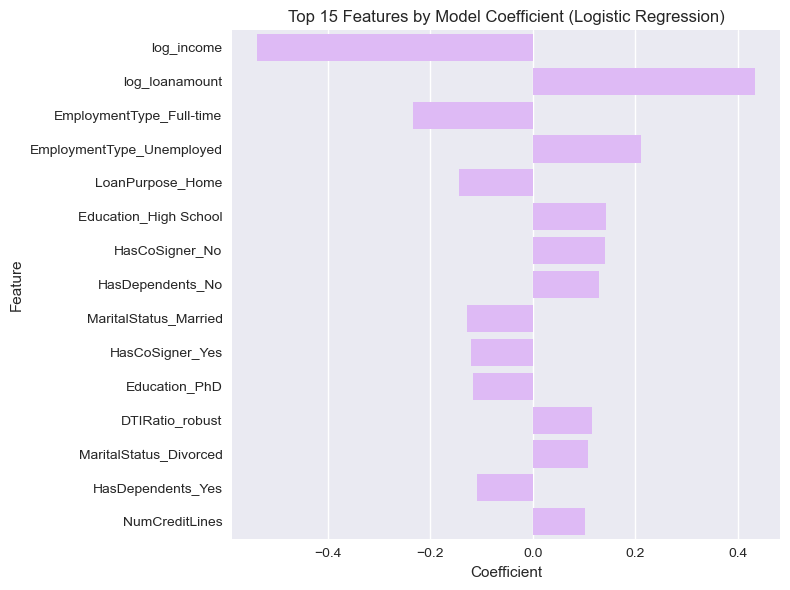

In [ ]:
# Remove 'Default' from X_train and X_test if present
for df in [X_train, X_test]:
    if 'Default' in df.columns:
        df.drop(columns='Default', inplace=True)

# Visualize the top 15 features by absolute coefficient with light pink/violet color
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, Y)

feature_names = X_train.columns
coefs = model.coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefs})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df.head(15), color='#e0b0ff')  # light violet
plt.title('Top 15 Features by Model Coefficient (Logistic Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Display all model coefficients sorted by absolute value
import pandas as pd

feature_names = X_train.columns
coefs = model.coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefs})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

print('All features by absolute coefficient (model effect):')
print(coef_df[['feature', 'coefficient']])

All features by absolute coefficient (model effect):
                         feature  coefficient
28                    log_income    -0.537573
29                log_loanamount     0.434178
10      EmploymentType_Full-time    -0.233153
13     EmploymentType_Unemployed     0.211295
24              LoanPurpose_Home    -0.144081
7          Education_High School     0.142947
26                HasCoSigner_No     0.141896
19              HasDependents_No     0.129068
15         MaritalStatus_Married    -0.128669
27               HasCoSigner_Yes    -0.120518
9                  Education_PhD    -0.115971
30               DTIRatio_robust     0.115597
14        MaritalStatus_Divorced     0.108247
20             HasDependents_Yes    -0.107691
3                 NumCreditLines     0.101247
17                HasMortgage_No     0.086414
22          LoanPurpose_Business     0.080850
4                   InterestRate     0.070045
8             Education_Master's    -0.069953
18               HasMortgag

In [ ]:
# List all risk factors (features with positive coefficients)
risk_factors = coef_df[coef_df['coefficient'] > 0]
print('Risk factors (features that increase the likelihood of default):')
print(risk_factors[['feature', 'coefficient']])

Risk factors (features that increase the likelihood of default):
                      feature  coefficient
29             log_loanamount     0.434178
13  EmploymentType_Unemployed     0.211295
7       Education_High School     0.142947
26             HasCoSigner_No     0.141896
19           HasDependents_No     0.129068
30            DTIRatio_robust     0.115597
14     MaritalStatus_Divorced     0.108247
3              NumCreditLines     0.101247
17             HasMortgage_No     0.086414
22       LoanPurpose_Business     0.080850
4                InterestRate     0.070045
6        Education_Bachelor's     0.064355
11   EmploymentType_Part-time     0.044619
16       MaritalStatus_Single     0.041800
21           LoanPurpose_Auto     0.036896
25          LoanPurpose_Other     0.028200
23      LoanPurpose_Education     0.019513
5                    LoanTerm     0.000432


In [ ]:
# List all factors (features with negative coefficients)
risk_factors = coef_df[coef_df['coefficient'] < 0]
print('Risk factors (features that reduce the likelihood of default):')
print(risk_factors[['feature', 'coefficient']])

Risk factors (features that reduce the likelihood of default):
                         feature  coefficient
28                    log_income    -0.537573
10      EmploymentType_Full-time    -0.233153
24              LoanPurpose_Home    -0.144081
15         MaritalStatus_Married    -0.128669
27               HasCoSigner_Yes    -0.120518
9                  Education_PhD    -0.115971
20             HasDependents_Yes    -0.107691
8             Education_Master's    -0.069953
18               HasMortgage_Yes    -0.065037
0                            Age    -0.038893
2                 MonthsEmployed    -0.009675
12  EmploymentType_Self-employed    -0.001383
1                    CreditScore    -0.000695


### Training ROC AUC 

In [ ]:
# Calculate and print the ROC AUC score for the model on the training set
from sklearn.metrics import roc_auc_score

# Predict probabilities for Default = 1 on training set
train_pred_proba = model.predict_proba(X_train)[:, 1]
auc = roc_auc_score(Y, train_pred_proba)
print(f'Training ROC AUC: {auc:.3f}')

In [ ]:
# Save the current notebook as a versioned checkpoint
import nbformat
from datetime import datetime
import os

notebook_path = '/Users/longhoachung/anaconda_projects/Challenges/Files/Loan_Default_Prediction_LC.ipynb'
version_time = datetime.now().strftime('%Y%m%d_%H%M%S')
versioned_path = f'/Users/longhoachung/anaconda_projects/Challenges/Files/Loan_Default_Prediction_LC_v{version_time}.ipynb'

with open(notebook_path, 'r') as f:
    nb = nbformat.read(f, as_version=4)
with open(versioned_path, 'w') as f:
    nbformat.write(nb, f)

print(f'Notebook saved as {versioned_path}')

In [ ]:
# Fit and evaluate RandomForest and XGBoost models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, Y)
rf_train_pred_proba = rf.predict_proba(X_train)[:, 1]
rf_auc = roc_auc_score(Y, rf_train_pred_proba)
print(f'Random Forest Training ROC AUC: {rf_auc:.3f}')


In [ ]:
# Visualize overfitting: plot training vs. cross-validated ROC AUC for Random Forest
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Compute cross-validated ROC AUC
cv_auc = cross_val_score(rf, X_train, Y, cv=5, scoring='roc_auc', n_jobs=-1)

# Plot
plt.figure(figsize=(6,4))
plt.bar(['Train'], [rf_auc], color='lightcoral', label='Train AUC')
plt.bar(['CV Mean'], [np.mean(cv_auc)], color='lightblue', label='CV Mean AUC')
plt.errorbar(['CV Mean'], [np.mean(cv_auc)], yerr=[[np.mean(cv_auc)-np.min(cv_auc)], [np.max(cv_auc)-np.mean(cv_auc)]], fmt='o', color='blue', capsize=5)
plt.ylabel('ROC AUC')
plt.title('Random Forest: Training vs Cross-Validated ROC AUC')
plt.ylim(0.5, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

print(f'Training ROC AUC: {rf_auc:.3f}')
print(f'CV ROC AUC (mean ± std): {np.mean(cv_auc):.3f} ± {np.std(cv_auc):.3f}')

In [ ]:
# Ridge (L2) Logistic Regression with hyperparameter tuning and cross-validated ROC AUC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
 
# Standardize features for regularized models
ridge_pipe = make_pipeline(StandardScaler(),
    LogisticRegressionCV(
        Cs=10,
        cv=5,
        penalty='l2',
        solver='lbfgs',
        scoring='roc_auc',
        max_iter=1000,
        random_state=42
    )
 )
 
ridge_pipe.fit(X, Y)
cv_scores = ridge_pipe.named_steps['logisticregressioncv'].scores_[1]  # 1 for positive class
mean_cv_auc = np.mean(cv_scores, axis=0)
best_idx = np.argmax(mean_cv_auc)
best_C = ridge_pipe.named_steps['logisticregressioncv'].Cs_[best_idx]
best_auc = mean_cv_auc[best_idx]
 
print(f"Best Ridge (L2) Logistic Regression CV ROC AUC: {best_auc:.3f} (C={best_C:.4f})")

In [ ]:
# Check for data leakage: Ensure 'Default' is not in X columns
if 'Default' in X.columns:
    print("Warning: 'Default' column found in X! Removing it to prevent data leakage.")
    X = X.drop(columns=['Default'])
else:
    print("No data leakage: 'Default' is not in X.")

In [ ]:
# Remove 'Default' from X if present (to prevent data leakage)
if 'Default' in X.columns:
    X = X.drop(columns=['Default'])
    print("'Default' column removed from X.")
else:
    print("'Default' column was not present in X.")

In [ ]:
# Refit Ridge (L2) Logistic Regression with cross-validation after removing 'Default' from X
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
 
ridge_pipe = make_pipeline(StandardScaler(),
    LogisticRegressionCV(
        Cs=np.logspace(-4, 4, 20),
        cv=5,
        penalty='l2',
        solver='lbfgs',
        scoring='roc_auc',
        max_iter=1000,
        random_state=42
    )
 )
 
ridge_pipe.fit(X, Y)
cv_scores = ridge_pipe.named_steps['logisticregressioncv'].scores_[1]  # 1 for positive class
mean_cv_auc = np.mean(cv_scores, axis=0)
best_idx = np.argmax(mean_cv_auc)
best_C = ridge_pipe.named_steps['logisticregressioncv'].Cs_[best_idx]
best_auc = mean_cv_auc[best_idx]
 
print(f"Best Ridge (L2) Logistic Regression CV ROC AUC: {best_auc:.3f} (C={best_C:.4f})")

### Note: Effect of Ridge Regularization on Model Performance
Adding Ridge (L2) regularization to the logistic regression did not change the cross-validated ROC AUC score (remained at 0.75).
This suggests that the model was not overfitting due to large coefficients, or that the features are already well-regularized. Further improvements may require feature engineering or more complex models.

In [ ]:
# Create interaction feature: income * loanamount
if 'Income' in train_df.columns and 'LoanAmount' in train_df.columns:
    train_df['Income_LoanAmount'] = train_df['Income'] * train_df['LoanAmount']
    print('Train set:')
    print(train_df['Income_LoanAmount'].describe())
else:
    print('Income or LoanAmount not found in train_df.')

if 'Income' in test_df.columns and 'LoanAmount' in test_df.columns:
    test_df['Income_LoanAmount'] = test_df['Income'] * test_df['LoanAmount']
    print('\nTest set:')
    print(test_df['Income_LoanAmount'].describe())
else:
    print('Income or LoanAmount not found in test_df.')

In [ ]:
# Create interaction feature: CreditScore * MonthsEmployed
if 'CreditScore' in train_df.columns and 'MonthsEmployed' in train_df.columns:
    train_df['CreditScore_MonthsEmployed'] = train_df['CreditScore'] * train_df['MonthsEmployed']
    print('Train set:')
    print(train_df['CreditScore_MonthsEmployed'].describe())
else:
    print('CreditScore or MonthsEmployed not found in train_df.')

if 'CreditScore' in test_df.columns and 'MonthsEmployed' in test_df.columns:
    test_df['CreditScore_MonthsEmployed'] = test_df['CreditScore'] * test_df['MonthsEmployed']
    print('\nTest set:')
    print(test_df['CreditScore_MonthsEmployed'].describe())
else:
    print('CreditScore or MonthsEmployed not found in test_df.')

In [ ]:
# Create and summarize additional interaction features
interaction_features = {
    'Income_InterestRate': ('Income', 'InterestRate'),
    'CreditScore_LoanAmount': ('CreditScore', 'LoanAmount'),
    'DTIRatio_LoanAmount': ('DTIRatio', 'LoanAmount'),
    'MonthsEmployed_Income': ('MonthsEmployed', 'Income'),
    'Age_LoanTerm': ('Age', 'LoanTerm'),
    'CreditScore_InterestRate': ('CreditScore', 'InterestRate'),
}

for feat_name, (col1, col2) in interaction_features.items():
    if col1 in train_df.columns and col2 in train_df.columns:
        train_df[feat_name] = train_df[col1] * train_df[col2]
        print(f'Train {feat_name}:')
        print(train_df[feat_name].describe())
    else:
        print(f'{col1} or {col2} not found in train_df.')

    if col1 in test_df.columns and col2 in test_df.columns:
        test_df[feat_name] = test_df[col1] * test_df[col2]
        print(f'\nTest {feat_name}:')
        print(test_df[feat_name].describe())
    else:
        print(f'{col1} or {col2} not found in test_df.')

## Model Comparison: Ridge Logistic Regression, Random Forest, and XGBoost
We will fit and evaluate the following models using cross-validated ROC AUC:
1. Ridge (L2) Logistic Regression
2. Random Forest Classifier
3. XGBoost Classifier
This will help us determine which model performs best with the current feature set, including interaction features.

In [ ]:
# 1. Ridge (L2) Logistic Regression with cross-validated ROC AUC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import cross_val_score
 
ridge_pipe = make_pipeline(StandardScaler(),
    LogisticRegressionCV(
        Cs=np.logspace(-4, 4, 20),
        cv=5,
        penalty='l2',
        solver='lbfgs',
        scoring='roc_auc',
        max_iter=1000,
        random_state=42
    )
 )
ridge_cv_auc = cross_val_score(ridge_pipe, X, Y, cv=5, scoring='roc_auc')
print(f'Ridge Logistic Regression CV ROC AUC: {ridge_cv_auc.mean():.3f} ± {ridge_cv_auc.std():.3f}')

# 2. Random Forest Classifier with cross-validated ROC AUC
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=20, random_state=42, n_jobs=-1)
rf_cv_auc = cross_val_score(rf, X, Y, cv=5, scoring='roc_auc')
print(f'Random Forest CV ROC AUC: {rf_cv_auc.mean():.3f} ± {rf_cv_auc.std():.3f}')

# 3. XGBoost Classifier with cross-validated ROC AUC
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
xgb_cv_auc = cross_val_score(xgb, X, Y, cv=5, scoring='roc_auc')
print(f'XGBoost CV ROC AUC: {xgb_cv_auc.mean():.3f} ± {xgb_cv_auc.std():.3f}')

In [ ]:
# Check class balance in the target variable
print('Target variable (Default) distribution:')
print(train_df['Default'].value_counts(normalize=True))

# Analyze the most common value (mode) in each categorical feature
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    mode = train_df[col].mode()[0]
    mode_pct = (train_df[col] == mode).mean() * 100
    print(f"{col}: mode = '{mode}' ({mode_pct:.2f}% of train set)")

In [ ]:
# Refit models with class weights to address class imbalance
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Ridge Logistic Regression with class_weight='balanced'
ridge_pipe_bal = make_pipeline(StandardScaler(),
    LogisticRegressionCV(
        Cs=np.logspace(-4, 4, 20),
        cv=5,
        penalty='l2',
        solver='lbfgs',
        scoring='roc_auc',
        max_iter=1000,
        random_state=42,
        class_weight='balanced'
    )
 )
ridge_cv_auc_bal = cross_val_score(ridge_pipe_bal, X, Y, cv=5, scoring='roc_auc')
print(f'Ridge Logistic Regression (balanced) CV ROC AUC: {ridge_cv_auc_bal.mean():.3f} ± {ridge_cv_auc_bal.std():.3f}')

# Random Forest with class_weight='balanced'
rf_bal = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=20, random_state=42, n_jobs=-1, class_weight='balanced')
rf_cv_auc_bal = cross_val_score(rf_bal, X, Y, cv=5, scoring='roc_auc')
print(f'Random Forest (balanced) CV ROC AUC: {rf_cv_auc_bal.mean():.3f} ± {rf_cv_auc_bal.std():.3f}')

# XGBoost with scale_pos_weight
scale_pos_weight = (Y == 0).sum() / (Y == 1).sum()
xgb_bal = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1, scale_pos_weight=scale_pos_weight)
xgb_cv_auc_bal = cross_val_score(xgb_bal, X, Y, cv=5, scoring='roc_auc')
print(f'XGBoost (balanced) CV ROC AUC: {xgb_cv_auc_bal.mean():.3f} ± {xgb_cv_auc_bal.std():.3f}')

In [ ]:
# Feature importance analysis for all models
import matplotlib.pyplot as plt
import pandas as pd

# 1. Ridge Logistic Regression coefficients
ridge_pipe.fit(X, Y)
ridge_coefs = ridge_pipe.named_steps['logisticregressioncv'].coef_.flatten()
ridge_importance = pd.Series(np.abs(ridge_coefs), index=X.columns).sort_values(ascending=False)[:15]

plt.figure(figsize=(8,4))
ridge_importance.plot(kind='barh')
plt.title('Top 15 Ridge Logistic Regression Coefficients (absolute)')
plt.xlabel('Coefficient Magnitude')
plt.gca().invert_yaxis()
plt.show()

# 2. Random Forest feature importances
rf.fit(X, Y)
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:15]

plt.figure(figsize=(8,4))
rf_importance.plot(kind='barh')
plt.title('Top 15 Random Forest Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

# 3. XGBoost feature importances
xgb.fit(X, Y)
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)[:15]

plt.figure(figsize=(8,4))
xgb_importance.plot(kind='barh')
plt.title('Top 15 XGBoost Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Evaluate XGBoost with multiple metrics using cross-validation
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import StratifiedKFold
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_metrics = {'roc_auc': [], 'pr_auc': [], 'precision': [], 'recall': [], 'f1': []}

for train_idx, test_idx in cv.split(X, Y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    xgb.fit(X_train, y_train)
    y_pred_proba = xgb.predict_proba(X_test)[:,1]
    y_pred = (y_pred_proba >= 0.5).astype(int)
    xgb_metrics['roc_auc'].append(roc_auc_score(y_test, y_pred_proba))
    xgb_metrics['pr_auc'].append(average_precision_score(y_test, y_pred_proba))
    xgb_metrics['precision'].append(precision_score(y_test, y_pred))
    xgb_metrics['recall'].append(recall_score(y_test, y_pred))
    xgb_metrics['f1'].append(f1_score(y_test, y_pred))

print('XGBoost Cross-Validated Metrics:')
print(f"ROC AUC: {np.mean(xgb_metrics['roc_auc']):.3f} ± {np.std(xgb_metrics['roc_auc']):.3f}")
print(f"PR AUC: {np.mean(xgb_metrics['pr_auc']):.3f} ± {np.std(xgb_metrics['pr_auc']):.3f}")
print(f"Precision: {np.mean(xgb_metrics['precision']):.3f} ± {np.std(xgb_metrics['precision']):.3f}")
print(f"Recall: {np.mean(xgb_metrics['recall']):.3f} ± {np.std(xgb_metrics['recall']):.3f}")
print(f"F1-score: {np.mean(xgb_metrics['f1']):.3f} ± {np.std(xgb_metrics['f1']):.3f}")

In [ ]:
# Evaluate Ridge Logistic Regression and Random Forest with multiple metrics using cross-validation
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ridge Logistic Regression
ridge_metrics = {'roc_auc': [], 'pr_auc': [], 'precision': [], 'recall': [], 'f1': []}
for train_idx, test_idx in cv.split(X, Y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    ridge_pipe.fit(X_train, y_train)
    y_pred_proba = ridge_pipe.predict_proba(X_test)[:,1]
    y_pred = (y_pred_proba >= 0.5).astype(int)
    ridge_metrics['roc_auc'].append(roc_auc_score(y_test, y_pred_proba))
    ridge_metrics['pr_auc'].append(average_precision_score(y_test, y_pred_proba))
    ridge_metrics['precision'].append(precision_score(y_test, y_pred))
    ridge_metrics['recall'].append(recall_score(y_test, y_pred))
    ridge_metrics['f1'].append(f1_score(y_test, y_pred))

print('Ridge Logistic Regression Cross-Validated Metrics:')
print(f"ROC AUC: {np.mean(ridge_metrics['roc_auc']):.3f} ± {np.std(ridge_metrics['roc_auc']):.3f}")
print(f"PR AUC: {np.mean(ridge_metrics['pr_auc']):.3f} ± {np.std(ridge_metrics['pr_auc']):.3f}")
print(f"Precision: {np.mean(ridge_metrics['precision']):.3f} ± {np.std(ridge_metrics['precision']):.3f}")
print(f"Recall: {np.mean(ridge_metrics['recall']):.3f} ± {np.std(ridge_metrics['recall']):.3f}")
print(f"F1-score: {np.mean(ridge_metrics['f1']):.3f} ± {np.std(ridge_metrics['f1']):.3f}")

# Random Forest
rf_metrics = {'roc_auc': [], 'pr_auc': [], 'precision': [], 'recall': [], 'f1': []}
for train_idx, test_idx in cv.split(X, Y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    rf.fit(X_train, y_train)
    y_pred_proba = rf.predict_proba(X_test)[:,1]
    y_pred = (y_pred_proba >= 0.5).astype(int)
    rf_metrics['roc_auc'].append(roc_auc_score(y_test, y_pred_proba))
    rf_metrics['pr_auc'].append(average_precision_score(y_test, y_pred_proba))
    rf_metrics['precision'].append(precision_score(y_test, y_pred))
    rf_metrics['recall'].append(recall_score(y_test, y_pred))
    rf_metrics['f1'].append(f1_score(y_test, y_pred))

print('Random Forest Cross-Validated Metrics:')
print(f"ROC AUC: {np.mean(rf_metrics['roc_auc']):.3f} ± {np.std(rf_metrics['roc_auc']):.3f}")
print(f"PR AUC: {np.mean(rf_metrics['pr_auc']):.3f} ± {np.std(rf_metrics['pr_auc']):.3f}")
print(f"Precision: {np.mean(rf_metrics['precision']):.3f} ± {np.std(rf_metrics['precision']):.3f}")
print(f"Recall: {np.mean(rf_metrics['recall']):.3f} ± {np.std(rf_metrics['recall']):.3f}")
print(f"F1-score: {np.mean(rf_metrics['f1']):.3f} ± {np.std(rf_metrics['f1']):.3f}")

In [ ]:
# Stacking ensemble: Ridge Logistic Regression, Random Forest, XGBoost
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

stack = StackingClassifier(
    estimators=[
        ('ridge', make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42))),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=20, random_state=42, n_jobs=-1, class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, eval_metric='logloss', random_state=42, n_jobs=-1, scale_pos_weight=scale_pos_weight))
    ],
    final_estimator=LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42),
    n_jobs=-1,
    passthrough=True,
    cv=5
 )

stack_auc = cross_val_score(stack, X, Y, cv=5, scoring='roc_auc')
stack_f1 = cross_val_score(stack, X, Y, cv=5, scoring='f1')
print(f'Stacking Classifier CV ROC AUC: {stack_auc.mean():.3f} ± {stack_auc.std():.3f}')
print(f'Stacking Classifier CV F1-score: {stack_f1.mean():.3f} ± {stack_f1.std():.3f}')

In [ ]:
# Fast stacking: use a 10,000-row sample and lighter models for speed
from sklearn.utils import resample

# Sample 10,000 rows (stratified)
sample_df = resample(pd.concat([X, Y], axis=1), n_samples=10000, stratify=Y, random_state=42)
X_sample = sample_df[X.columns]
Y_sample = sample_df[Y.name]

stack_fast = StackingClassifier(
    estimators=[
        ('ridge', make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500, class_weight='balanced', random_state=42))),
        ('rf', RandomForestClassifier(n_estimators=20, max_depth=4, min_samples_leaf=50, random_state=42, n_jobs=-1, class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=20, max_depth=4, learning_rate=0.2, subsample=0.8, colsample_bytree=0.8, eval_metric='logloss', random_state=42, n_jobs=-1, scale_pos_weight=scale_pos_weight))
    ],
    final_estimator=LogisticRegression(solver='lbfgs', max_iter=500, class_weight='balanced', random_state=42),
    n_jobs=-1,
    passthrough=True,
    cv=3
 )

stack_auc_fast = cross_val_score(stack_fast, X_sample, Y_sample, cv=3, scoring='roc_auc')
stack_f1_fast = cross_val_score(stack_fast, X_sample, Y_sample, cv=3, scoring='f1')
print(f'Fast Stacking Classifier CV ROC AUC: {stack_auc_fast.mean():.3f} ± {stack_auc_fast.std():.3f}')
print(f'Fast Stacking Classifier CV F1-score: {stack_f1_fast.mean():.3f} ± {stack_f1_fast.std():.3f}')

In [ ]:
# XGBoost (if not installed, uncomment the next line to install)
!pip install xgboost
for df in [X_train, X_test]:
    if 'NumCreditLines_binned' in df.columns:
        df['NumCreditLines_binned'] = df['NumCreditLines_binned'].astype(int)
try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
    xgb.fit(X_train, Y)
    xgb_train_pred_proba = xgb.predict_proba(X_train)[:, 1]
    xgb_auc = roc_auc_score(Y, xgb_train_pred_proba)
    print(f'XGBoost Training ROC AUC: {xgb_auc:.3f}')
except ImportError:
    print('XGBoost is not installed. Please install it with: !pip install xgboost')

In [ ]:
# Extract and print correlations for specific one-hot encoded columns with Default (Y)
specific_features = [
    'EmploymentType_Part-time', 'EmploymentType_Self-employed',
    'MaritalStatus_Married', 'MaritalStatus_Divorced',
    'HasMortgage_Yes', 'HasMortgage_No',
    'HasDependents_Yes', 'HasDependents_No'
]

print('Correlations of selected one-hot encoded features with Default (Y):')
for feature in specific_features:
    if feature in corr_matrix['Default'].index:
        print(f"{feature}: {corr_matrix['Default'][feature]:.3f}")
    else:
        print(f"{feature}: not found in correlation matrix")

In [ ]:
# Fit a logistic regression model and display coefficients for all features
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Fit the model (use solver='liblinear' for small/medium datasets)
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, Y)

# Get feature names and coefficients
feature_names = X_train.columns
coefs = model.coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefs})

# Sort by absolute value of coefficient
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

print('Top features by absolute coefficient (model effect):')
print(coef_df[['feature', 'coefficient']].head(20))

# Optionally, filter for one-hot encoded features (those with underscores)
ohe_coefs = coef_df[coef_df['feature'].str.contains('_')]
print('\nOne-hot encoded feature coefficients:')

print(ohe_coefs[['feature', 'coefficient']].head(20))

In [ ]:
# Fit logistic regression, predict probabilities and classes, with error handling
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import NotFittedError

try:
    model = LogisticRegression(solver='liblinear', max_iter=1000)
    model.fit(X_train, Y)
    
    # Predict probabilities for Default = 1
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Predict class (0 or 1)
    y_pred = model.predict(X_test)
    
    print('First 10 predicted probabilities:', y_pred_proba[:10])
    print('First 10 predicted classes:', y_pred[:10])
except ValueError as e:
    print('ValueError:', e)
    print('Check that all features are numeric and there are no missing values in X_train/X_test.')
except NotFittedError as e:
    print('NotFittedError:', e)
except Exception as e:
    print('Unexpected error:', e)

In [ ]:
#Convert NumCreditLines to categorical variable
print("Converting NumCreditLines to categorical variable...")

# First, let's examine the distribution of NumCreditLines
print("\nNumCreditLines distribution before binning:")
print(train_df['NumCreditLines'].describe())

# Define the bin edges for categorization based on the actual distribution
# Adjusted bins to match the real data range (1-4)
bins = [0, 1, 2, 3, 4, float('inf')]
bin_labels = ['0-1', '1-2', '2-3', '3-4', '4+']  # Fixed: 5 bin edges needs 4 bin labels

# Apply the binning to create a new categorical feature
train_df['NumCreditLines_Cat'] = pd.cut(train_df['NumCreditLines'], bins=bins, labels=bin_labels)
test_df['NumCreditLines_Cat'] = pd.cut(test_df['NumCreditLines'], bins=bins, labels=bin_labels)

# Display the distribution of the new categorical feature
print("\nNumCreditLines categorical distribution (train):")
display(train_df['NumCreditLines_Cat'].value_counts().sort_index())
print("\nNumCreditLines categorical distribution (test):")
display(test_df['NumCreditLines_Cat'].value_counts().sort_index())

# Add to categorical columns list for further processing
if 'NumCreditLines_Cat' not in categorical_columns:
    categorical_columns.append('NumCreditLines_Cat')

# Log this transformation
transformation_log = pd.DataFrame({
    'Feature': ['NumCreditLines'],
    'Transformation': ['Converted to categorical bins'],
    'New Feature': ['NumCreditLines_Cat'],
    'Reason': ['Distribution differences between train/test sets, better model fit with categorical representation']
})
display(transformation_log)

# Now we can use this categorical version instead of the numerical one in our model
print("\nUpdated categorical columns list:")
print(categorical_columns)

### Correlation Analysis Documentation

Before running the correlation analysis, ensure that all preprocessing steps (feature engineering, encoding, and scaling) have been completed and `X_train` is defined. This guarantees the correlation matrix reflects the final set of features used for modeling.

The correlation matrix helps:
- Identify highly correlated features (potential multicollinearity)
- Guide feature selection or dimensionality reduction
- Provide insights into feature relationships

Always document the order of cell execution and any key findings from the correlation analysis for reproducibility and transparency.

In [ ]:
            "# List top 15 features that increase vs decrease default risk\\n",
                "import pandas as pd\\n",
                "import numpy as np\\n",
                "from sklearn.linear_model import LogisticRegression\\n",
                "from sklearn.preprocessing import StandardScaler\\n",
                "from sklearn.pipeline import Pipeline\\n",
                "\\n",
                "# Assuming train_df exists with a binary target column\\n",
                "# Common target names for loan default prediction\\n",
                "target_candidates = ['default', 'Default', 'loan_default', 'LoanDefault', 'target', 'y']\\n",
                "target_col = None\\n",
                "\\n",
                "for col in target_candidates:\\n",
                "    if col in train_df.columns:\\n",
                "        target_col = col\\n",
                "        break\\n",
                "\\n",
                "# If no standard name found, look for binary columns\\n",
                "if target_col is None:\\n",
                "    for col in train_df.columns:\\n",
                "        if train_df[col].nunique() == 2:\\n",
                "            unique_vals = train_df[col].unique()\\n",
                "            if set(unique_vals).issubset({0, 1}) or set(unique_vals).issubset({0.0, 1.0}):\\n",
                "                target_col = col\\n",
                "                break\\n",
                "\\n",
                "if target_col is None:\\n",
                "    print('Available columns:', train_df.columns.tolist())\\n",
                "    raise ValueError('Could not identify binary target column. Please specify manually.')\\n",
                "\\n",
                "print(f'Using target column: {target_col}')\\n",
                "\\n",
                "# Prepare features (drop ID columns and target)\\n",
                "id_cols = [col for col in train_df.columns if 'id' in col.lower()]\\n",
                "feature_cols = [col for col in train_df.columns if col != target_col and col not in id_cols]\\n",
                "\\n",
                "X = train_df[feature_cols]\\n",
                "y = train_df[target_col]\\n",
                "\\n",
                "# Handle categorical variables\\n",
                "X_processed = pd.get_dummies(X, drop_first=True, dummy_na=True)\\n",
                "\\n",
                "# Fill missing values\\n",
                "X_processed = X_processed.fillna(X_processed.median())\\n",
                "\\n",
                "# Fit logistic regression to get feature coefficients\\n",
                "pipeline = Pipeline([\\n",
                "    ('scaler', StandardScaler()),\\n",
                "    ('logistic', LogisticRegression(random_state=42, max_iter=1000))\\n",
                "])\\n",
                "\\n",
                "pipeline.fit(X_processed, y)\\n",
                "\\n",
                "# Get coefficients\\n",
                "coefficients = pipeline.named_steps['logistic'].coef_[0]\\n",
                "feature_names = X_processed.columns\\n",
                "\\n",
                "# Create coefficient dataframe\\n",
                "coef_df = pd.DataFrame({\\n",
                "    'feature': feature_names,\\n",
                "    'coefficient': coefficients\\n",
                "}).sort_values('coefficient')\\n",
                "\\n",
                "# Top 15 features that INCREASE default risk (positive coefficients)\\n",
                "top_positive = coef_df.tail(15)[['feature', 'coefficient']]\\n",
                "top_positive = top_positive.sort_values('coefficient', ascending=False)\\n",
                "\\n",
                "# Top 15 features that REDUCE default risk (negative coefficients)\\n",
                "top_negative = coef_df.head(15)[['feature', 'coefficient']]\\n",
                "\\n",
                "print('\\\\n=== TOP 15 FEATURES THAT INCREASE DEFAULT RISK ===')\\n",
                "print('(Higher values = Higher default probability)')\\n",
                "for i, (_, row) in enumerate(top_positive.iterrows(), 1):\\n",
                "    print(f'{i:2d}. {row[\\\"feature\\\"]:40s} coef: {row[\\\"coefficient\\\"]:8.4f}')\\n",
                "\\n",
                "print('\\\\n=== TOP 15 FEATURES THAT REDUCE DEFAULT RISK ===')\\n",
                "print('(Higher values = Lower default probability)')\\n",
                "for i, (_, row) in enumerate(top_negative.iterrows(), 1):\\n",
                "    print(f'{i:2d}. {row[\\\"feature\\\"]:40s} coef: {row[\\\"coefficient\\\"]:8.4f}')\\n",
                "\\n",
                "# Store results for further analysis\\n",
                "risk_increasing_features = top_positive\\n",
                "risk_reducing_features = top_negative"


IndentationError: unexpected indent (3238811520.py, line 2)